# Preprocessing
---

In [1]:
import pandas as pd
import numpy as np
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', None)

# df_연결[df_연결["회사명"].str.contains('인수목적')].index # 포함하는거 표시

In [2]:
# func 모음

# 1. 종목코드를 6자리로 통일. ex) 990 -> 000990
def padding(x):
    x = str(x)
    return x.rjust(6, "0")

# 2. 결산월 12월인 것만 선택
# : 전체 데이터 4963개 중에서 12월 결산인 데이터가 4836개이다. 나머지 결산월의 데이터가 전체의 2.5%로 데이터량이 작기도하고 결측치가 많아 제거
def func_yearin(x):
    if x[5:7] == '12':
        return True
    else:
        return False

# 3. 회계년도컬럼, 년도만 뽑아서 int화
def change_year(x):
    return int(x[:4])

# 4. 연결, 개별재무지표 통합을 위해 연결재무 데이터 컬럼명 통일화 : "(IFRS연결)"제거
def func_replace_col1(x):
    x = x.replace(" ","")
    x = x.replace(",","")
    x = x.replace("(비교)","")
    return x.replace("(IFRS연결)","")

# 5. 연결, 개별재무지표 통합을 위해 개별재무 데이터 컬럼명 통일화 : "(IFRS)"제거
def func_replace_col2(x):
    x = x.replace(" ","")
    x = x.replace(",","")
    x = x.replace("(비교)","")
    return x.replace("(IFRS)","")

# 6. 2020년 raw data 제외
def func_rm_2020(x):
    if x[:4] == "2020":
        return False
    else:
        return True

# 7. True, False 반전
def func_not(x):
    return not x

---
## 주가 상승 확인

In [740]:
# df[df["회사명"]=="LG이노텍(주)"]
# (주)경인양행 2015-2016
# (주)금비 2014-2015
# LG이노텍(주) 2013-2014
# 기간 : 02.01 ~ 03.30

In [741]:
df_LG이노텍 = pd.read_csv("./datasets/raw/주가상승확인/LG이노텍_20140201_20150331.csv", index_col="날짜")
df_LG이노텍.sort_values(by="날짜", ascending=True, inplace=True)
df_LG이노텍

,종가,오픈,고가,저가,거래량,변동 %
날짜,,,,,,
2014- 02- 03,"84,700","83,800","85,000","82,500",127.94K,-0.35%
2014- 02- 04,"84,100","82,800","84,600","82,800",84.75K,-0.71%
2014- 02- 05,"83,300","84,300","84,800","82,600",80.49K,-0.95%
2014- 02- 06,"83,800","83,200","84,900","83,200",80.42K,0.60%
2014- 02- 07,"86,500","84,100","86,900","84,100",153.49K,3.22%
...,...,...,...,...,...,...
2015- 03- 25,"111,000","115,000","116,000","110,500",173.13K,-3.48%
2015- 03- 26,"111,000","109,000","112,000","108,500",144.55K,0.00%
2015- 03- 27,"114,500","111,000","115,000","110,500",172.27K,3.15%


/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_53838/4065861212.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<AxesSubplot: xlabel='날짜'>

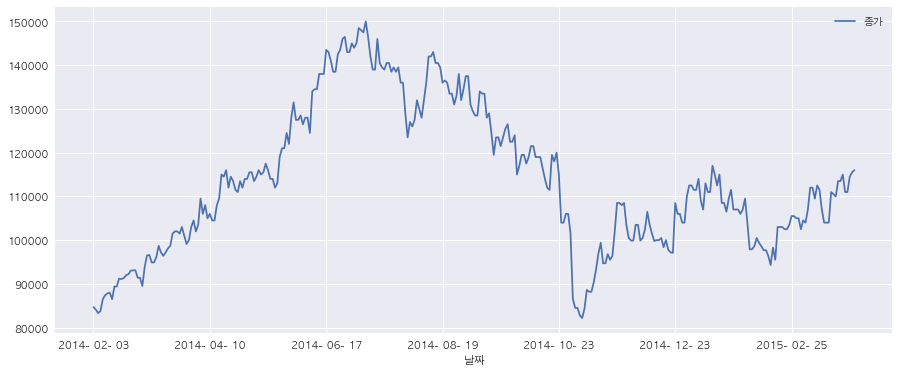

In [744]:
df_LG이노텍 = pd.read_csv("./datasets/raw/주가상승확인/LG이노텍_20140201_20150331.csv", index_col="날짜")
df_LG이노텍.sort_values(by="날짜", ascending=True, inplace=True)

def func_replace(x):
    return int(x.replace(",",""))

df_LG이노텍["종가"] = df_LG이노텍["종가"].map(func_replace)

import matplotlib.pyplot as plt
import warnings
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "AppleGothic"

df_LG이노텍.plot(y = ['종가'], figsize = [15,6], grid = True)

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_53838/3596247865.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<AxesSubplot: xlabel='날짜'>

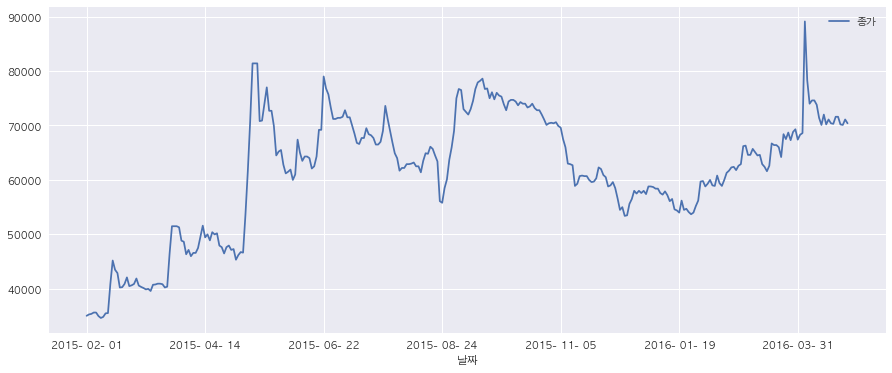

In [742]:
df_금비 = pd.read_csv("./datasets/raw/주가상승확인/금비_20150201_20160430.csv", index_col="날짜")
df_금비.sort_values(by="날짜", ascending=True, inplace=True)

def func_replace(x):
    return int(x.replace(",",""))

df_금비["종가"] = df_금비["종가"].map(func_replace)

import matplotlib.pyplot as plt
import warnings
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "AppleGothic"

df_금비.plot(y = ['종가'], figsize = [15,6], grid = True)

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_53838/550950680.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<AxesSubplot: xlabel='날짜'>

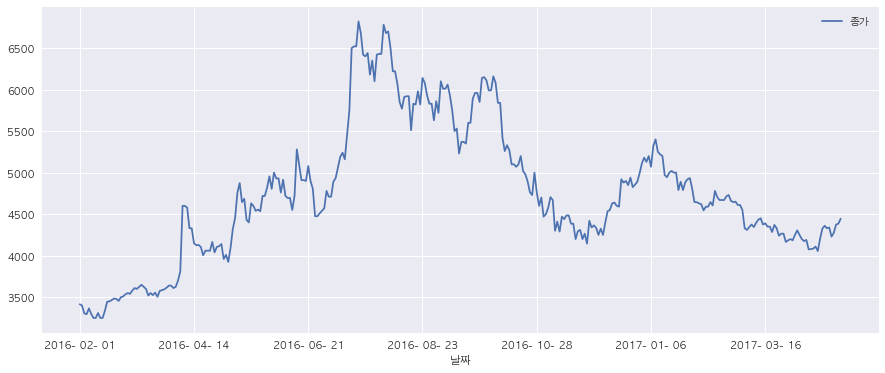

In [743]:
df_경인양행 = pd.read_csv("./datasets/raw/주가상승확인/경인양행_20160201_20170430.csv", index_col="날짜")
df_경인양행.sort_values(by="날짜", ascending=True, inplace=True)

def func_replace(x):
    return int(x.replace(",",""))

df_경인양행["종가"] = df_경인양행["종가"].map(func_replace)

import matplotlib.pyplot as plt
import warnings
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "AppleGothic"

df_경인양행.plot(y = ['종가'], figsize = [15,6], grid = True)

---
## 재무데이터 전처리(부실징후기업대상데이터로)

### 1. 데이터 통합(연결,별도)

In [214]:
# # 드랍해야하는 컬럼(중복) - 생산성
# list_overlap1 = ['부가가치(IFRS연결)(백만원)', '종업원1인당 부가가치(IFRS연결)(백만원)', '총자본투자효율(IFRS연결)', '기계투자효율(IFRS연결)', '부가가치율(IFRS연결)']
# list_overlap2 = ['부가가치(IFRS)(백만원)', '종업원1인당 부가가치(IFRS)(백만원)', '총자본투자효율(IFRS)', '기계투자효율(IFRS)', '부가가치율(IFRS)']

# # 안쓰는 컬럼 - 부가,생산,성장,수익,안정,활동 나눠서 드랍하고 처음부터 다시!
# # 1) 연결재무지표
# list_drop_연결_부가가치1 = ['세금과공과(IFRS연결)(백만원)', "기계투자효율(IFRS연결)"]
# list_drop_연결_성장성1 = ['비유동생물자산증가율(IFRS연결)', '투자부동산증가율(IFRS연결)',]
# list_drop_연결_수익성1 = ['기타손익비률(IFRS연결)', '외환이익 대 매출액비율(IFRS연결)', '광고선전비 대 매출액비율(IFRS연결)', '세금과공과 대 세금과공과 차감전순이익률(IFRS연결)', '세금과공과 대 총비용비율(IFRS연결)', '감가상각비 대 총비용비율(IFRS연결)',
#                     '감가상각률(IFRS연결)', '누적감가상각률(IFRS연결)', '1주당매출액(IFRS연결)(원)', '1주당순이익(IFRS연결)(원)', '1주당 CASH FLOW(IFRS연결)(원)', '1주당정상영업이익(IFRS연결)(원)',]
# list_drop_연결_안정성1 = ['비유동비율(IFRS연결)','비유동장기적합률(IFRS연결)','매출채권 대 매입채무비율(IFRS연결)','매출채권 대 상,제품비율(IFRS연결)', '부채비율(IFRS연결)','단기차입금 대 총차입금비율(IFRS연결)','유보액대비율(IFRS연결)','유보액 대 납입자본배율(IFRS연결)',
#                     '유동자산집중도(IFRS연결)','비유동자산집중도(IFRS연결)','투자집중도(IFRS연결)', '정상영업이익대비이자보상배율(IFRS연결)', '이자보상배율(순금융비용)(IFRS연결)']
# list_drop_연결_활동성1 = ['경영자본회전률(IFRS연결)','상품,제품회전률(IFRS연결)','원,부재료회전률(IFRS연결)','재공품회전률(IFRS연결)']
# # 2) 개별재무지표
# list_drop_별도_부가가치2 = ['세금과공과(IFRS)(백만원)', "기계투자효율(IFRS)"]
# list_drop_별도_성장성2 = ['비유동생물자산증가율(IFRS)', '투자부동산증가율(IFRS)',]
# list_drop_별도_수익성2 = ['기타손익비률(IFRS)', '외환이익 대 매출액비율(IFRS)', '광고선전비 대 매출액비율(IFRS)', '세금과공과 대 세금과공과 차감전순이익률(IFRS)', '세금과공과 대 총비용비율(IFRS)', '감가상각비 대 총비용비율(IFRS)',
#                     '감가상각률(IFRS)', '누적감가상각률(IFRS)', '1주당매출액(IFRS)(원)', '1주당순이익(IFRS)(원)', '1주당 CASH FLOW(IFRS)(원)', '1주당정상영업이익(IFRS)(원)',]
# list_drop_별도_안정성2 = ['비유동비율(IFRS)','비유동장기적합률(IFRS)','매출채권 대 매입채무비율(IFRS)','매출채권 대 상,제품비율(IFRS)', '부채비율(IFRS)','단기차입금 대 총차입금비율(IFRS)','유보액대비율(IFRS)','유보액 대 납입자본배율(IFRS)',
#                     '유동자산집중도(IFRS)','비유동자산집중도(IFRS)','투자집중도(IFRS)', '정상영업이익대비이자보상배율(IFRS)', '이자보상배율(순금융비용)(IFRS)']
# list_drop_별도_활동성2 = ['경영자본회전률(IFRS)','상품,제품회전률(IFRS)','원,부재료회전률(IFRS)','재공품회전률(IFRS)']

In [216]:
# df_연결_부가가치 = pd.read_excel("./datasets/raw/사업보고서/사업보고서_연결/연결_부가가치.xlsx")
# df_연결_생산성 = pd.read_excel("./datasets/raw/사업보고서/사업보고서_연결/연결_생산성.xlsx")
# df_연결_성장성 = pd.read_excel("./datasets/raw/사업보고서/사업보고서_연결/연결_성장성.xlsx")
# df_연결_수익성 = pd.read_excel("./datasets/raw/사업보고서/사업보고서_연결/연결_수익성.xlsx")
# df_연결_안정성 = pd.read_excel("./datasets/raw/사업보고서/사업보고서_연결/연결_안정성.xlsx")
# df_연결_활동성 = pd.read_excel("./datasets/raw/사업보고서/사업보고서_연결/연결_활동성.xlsx")
# df_연결_부가가치.drop(list_drop_연결_부가가치1, axis=1, inplace=True)
# df_연결_생산성 = df_연결_생산성.drop(list_overlap1, axis=1)
# df_연결_성장성.drop(list_drop_연결_성장성1, axis=1, inplace=True)
# df_연결_수익성.drop(list_drop_연결_수익성1, axis=1, inplace=True)
# df_연결_안정성.drop(list_drop_연결_안정성1, axis=1, inplace=True)
# df_연결_활동성.drop(list_drop_연결_활동성1, axis=1, inplace=True)

# df_사업보고서_연결 = pd.merge(df_연결_부가가치, df_연결_생산성, on=["회사명","거래소코드","회계년도"], how = 'inner')
# df_사업보고서_연결 = pd.merge(df_사업보고서_연결, df_연결_성장성, on=["회사명","거래소코드","회계년도"], how = 'inner')
# df_사업보고서_연결 = pd.merge(df_사업보고서_연결, df_연결_수익성, on=["회사명","거래소코드","회계년도"], how = 'inner')
# df_사업보고서_연결 = pd.merge(df_사업보고서_연결, df_연결_안정성, on=["회사명","거래소코드","회계년도"], how = 'inner')
# df_사업보고서_연결 = pd.merge(df_사업보고서_연결, df_연결_활동성, on=["회사명","거래소코드","회계년도"], how = 'inner')
# df_사업보고서_연결["거래소코드"] = df_사업보고서_연결["거래소코드"].map(padding) # 거래소코드 padding
# df_사업보고서_연결 = df_사업보고서_연결[df_사업보고서_연결["회계년도"].map(func_yearin)] # 12월 결산 기업만
# df_사업보고서_연결["회계년도"] = df_사업보고서_연결["회계년도"].map(change_year) # 년도만 표시

# list_col = list() # 컬럼명에서 "IFRS연결", " ", "," 제거
# for i in list(df_사업보고서_연결.columns):
#     list_col.append(func_replace_col1(i))
# df_사업보고서_연결.columns = list_col

# df_사업보고서_연결.drop_duplicates(['거래소코드',"회계년도"], keep='last', inplace=True)
# df_사업보고서_연결.reset_index(drop=True, inplace=True)

# df_사업보고서_연결.to_csv("./datasets/raw/사업보고서/사업보고서_연결.csv")
# df_사업보고서_연결.shape

(19145, 112)

In [218]:
# df_별도_부가가치 = pd.read_excel("./datasets/raw/사업보고서/사업보고서_별도/별도_부가가치.xlsx")
# df_별도_생산성 = pd.read_excel("./datasets/raw/사업보고서/사업보고서_별도/별도_생산성.xlsx")
# df_별도_성장성 = pd.read_excel("./datasets/raw/사업보고서/사업보고서_별도/별도_성장성.xlsx")
# df_별도_수익성 = pd.read_excel("./datasets/raw/사업보고서/사업보고서_별도/별도_수익성.xlsx")
# df_별도_안정성 = pd.read_excel("./datasets/raw/사업보고서/사업보고서_별도/별도_안정성.xlsx")
# df_별도_활동성 = pd.read_excel("./datasets/raw/사업보고서/사업보고서_별도/별도_활동성.xlsx")
# df_별도_부가가치.drop(list_drop_별도_부가가치2, axis=1, inplace=True)
# df_별도_생산성 = df_별도_생산성.drop(list_overlap2, axis=1)
# df_별도_성장성.drop(list_drop_별도_성장성2, axis=1, inplace=True)
# df_별도_수익성.drop(list_drop_별도_수익성2, axis=1, inplace=True)
# df_별도_안정성.drop(list_drop_별도_안정성2, axis=1, inplace=True)
# df_별도_활동성.drop(list_drop_별도_활동성2, axis=1, inplace=True)

# df_사업보고서_별도 = pd.merge(df_별도_부가가치, df_별도_생산성, on=["회사명","거래소코드","회계년도"], how = 'inner')
# df_사업보고서_별도 = pd.merge(df_사업보고서_별도, df_별도_성장성, on=["회사명","거래소코드","회계년도"], how = 'inner')
# df_사업보고서_별도 = pd.merge(df_사업보고서_별도, df_별도_수익성, on=["회사명","거래소코드","회계년도"], how = 'inner')
# df_사업보고서_별도 = pd.merge(df_사업보고서_별도, df_별도_안정성, on=["회사명","거래소코드","회계년도"], how = 'inner')
# df_사업보고서_별도 = pd.merge(df_사업보고서_별도, df_별도_활동성, on=["회사명","거래소코드","회계년도"], how = 'inner')
# df_사업보고서_별도 = df_사업보고서_별도[df_사업보고서_별도["회계년도"].map(func_rm_2020)]
# df_사업보고서_별도["거래소코드"] = df_사업보고서_별도["거래소코드"].map(padding)
# df_사업보고서_별도 = df_사업보고서_별도[df_사업보고서_별도["회계년도"].map(func_yearin)]
# df_사업보고서_별도["회계년도"] = df_사업보고서_별도["회계년도"].map(change_year)

# list_col = list() # 컬럼명에서 "IFRS", " ", "," 제거
# for i in list(df_사업보고서_별도.columns):
#     list_col.append(func_replace_col2(i))
# df_사업보고서_별도.columns = list_col

# df_사업보고서_별도.drop_duplicates(['거래소코드',"회계년도"], keep='last', inplace=True)
# df_사업보고서_별도.reset_index(drop=True, inplace=True)

# df_사업보고서_별도.to_csv("./datasets/raw/사업보고서/사업보고서_별도.csv")
# df_사업보고서_별도.shape

(19145, 112)

### 2. 연결재무데이터 결측치 확인

In [110]:
df_연결 = pd.read_csv("./datasets/raw/사업보고서/사업보고서_연결.csv", index_col=0)
df_연결.reset_index(drop=True, inplace=True)
df_연결["거래소코드"] = df_연결["거래소코드"].map(padding)
df_연결
# df_연결["거래소코드"].value_counts() # 거래소코드 + 회계년도 중복인거 확인

,회사명,거래소코드,회계년도,부가가치(백만원),법인세비용차감전(계속사업)손익(백만원),인건비(백만원),금융비용(백만원),임차료(백만원),감가상각비(백만원),종업원1인당부가가치(백만원),...,당좌자산회전률,재고자산회전률,재고자산회전기간,매출채권회전률,매출채권회전기간,비유동자산회전률,유형자산회전율,순운전자본회전률,운전자본회전률,1회전기간
0,(주)CMG제약,058820,2011,3472.17,-1508.28,3118.67,141.57,376.12,1344.09,NaN,...,1.55,6.42,56.81,2.45,148.80,1.38,1.77,0.86,0.00,0.01
1,(주)CMG제약,058820,2012,269.31,-6660.15,4712.51,411.52,401.09,1404.34,NaN,...,0.57,5.71,63.97,1.85,197.16,1.48,1.71,0.42,0.00,0.00
2,(주)CMG제약,058820,2013,6994.90,311.19,4986.26,337.40,243.90,1116.14,NaN,...,0.52,5.39,67.75,2.07,176.20,1.47,2.03,0.42,0.79,0.01
3,(주)CMG제약,058820,2014,7061.34,158.04,5599.85,-147.32,215.13,1464.84,NaN,...,0.80,4.77,76.46,1.86,196.72,0.96,1.54,0.56,0.74,0.00
4,(주)CMG제약,058820,2015,4315.37,-3650.09,6218.50,-29.83,195.67,1890.05,NaN,...,1.22,5.22,69.98,2.10,174.14,0.90,1.48,0.75,0.60,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19140,흥아해운(주),003280,2015,103792.31,13509.26,52570.08,18751.33,0.00,18964.51,NaN,...,6.38,68.48,5.33,25.33,14.41,1.47,2.09,2.15,0.01,0.00
19141,흥아해운(주),003280,2016,105291.39,-16576.37,70010.36,26701.98,0.00,25157.71,NaN,...,7.96,56.47,6.46,25.24,14.46,1.10,1.44,2.19,0.02,0.00
19142,흥아해운(주),003280,2017,46072.27,-72565.48,60440.89,30688.04,0.00,27508.83,NaN,...,9.30,44.09,8.28,23.08,15.81,1.05,1.36,2.09,0.02,2.64
19143,흥아해운(주),003280,2018,34054.90,-91209.02,68757.28,32180.14,0.00,24326.58,NaN,...,8.14,38.87,9.39,19.15,19.06,1.06,1.43,1.75,0.02,0.00


외국계기업 제거

In [111]:
def func_isnt_fcompany(x):
    if x[:1] == '9':
        return False
    else:
        return True

df_연결 = df_연결[df_연결["거래소코드"].map(func_isnt_fcompany)]
df_연결.shape # 외국계기업 데이터 140개 제거

(19005, 112)

거래소 코드가 2개인 기업(26개)과 기업명이 2개인 거래소 코드(1개)가 존재

In [112]:
print("회사수 : ", len(df_연결["회사명"].unique()))
print("거래소코드수 : ", len(df_연결["거래소코드"].unique()))
# 25개 차이

회사수 :  2478
거래소코드수 :  2504


In [113]:
list_overlap_code = list()
for i in list(df_연결["회사명"].unique()):
    if len(df_연결[df_연결["회사명"]==i]["거래소코드"].unique()) > 1:
        list_overlap_code.append(i)
len(list_overlap_code)

26

In [114]:
list_overlap_code

['(주)본느',
 '(주)세화피앤씨',
 '(주)신성이엔지',
 '(주)아이엘사이언스',
 '(주)알로이스',
 '(주)에스에이티',
 '(주)엔케이맥스',
 '(주)원바이오젠',
 '(주)원익피앤이',
 '(주)인산가',
 '(주)자비스',
 '(주)정다운',
 '(주)카이노스메드',
 '(주)티에스트릴리온',
 '(주)판타지오',
 '(주)포인트엔지니어링',
 '(주)한국비엔씨',
 '나무기술(주)',
 '삼성물산(주)',
 '소프트캠프(주)',
 '씨아이에스(주)',
 '에스케이(주)',
 '엠에프엠코리아(주)',
 '원텍(주)',
 '줌인터넷(주)',
 '패션플랫폼(주)']

In [115]:
# 중복 거래소코드 제거
def func_overlap_code(x):
    if x == (df_연결[df_연결["회사명"]==company_name]["거래소코드"].iloc[-1]) :
        return True
    else:
        return False

list_companyname = list(df_연결["회사명"].unique())
dfs = list()
for i in list_companyname:
    company_name = i
    #각 기업별로 데이터프레임 생성
    df_concat = df_연결[df_연결["회사명"]==i]
    df_concat = df_concat[df_concat["거래소코드"].map(func_overlap_code)] # 거래소코드 바뀌기 전의 거래소코드의 데이터는 삭제
    dfs.append(df_concat)
df_연결 = pd.concat(dfs)
df_연결.reset_index(drop=True, inplace=True)

In [116]:
df_연결.shape # 19005개 -> 18877

(18877, 112)

In [117]:
# 기업명이 2개인 거래소코드 존재 확인 - 엄슴
list_overlap_code = list()
for i in list(df_연결["거래소코드"].unique()):
    if len(df_연결[df_연결["거래소코드"]==i]["회사명"].unique()) > 1:
        list_overlap_code.append(i)
list_overlap_code

[]

In [118]:
# 중복 회사명 제거
def func_overlap_code(x):
    if x == (df_연결[df_연결["거래소코드"]==company_code]["회사명"].iloc[-1]) :
        return True
    else:
        return False

list_companyname = list(df_연결["거래소코드"].unique())
dfs = list()
for i in list_companyname:
    company_code = i
    #각 기업별로 데이터프레임 생성
    df_concat = df_연결[df_연결["거래소코드"]==i]
    df_concat = df_concat[df_concat["회사명"].map(func_overlap_code)] # 회사명 바뀌기 전의 회사명의 데이터는 삭제
    dfs.append(df_concat)
df_연결 = pd.concat(dfs)
df_연결.reset_index(drop=True, inplace=True)

In [119]:
df_연결.shape # 19005개 -> 18877 -> ;;

(18877, 112)

스팩주 확인

In [120]:
# 리스트 뽑아서 성연이형이 직접 확인
a = pd.DataFrame(df_연결["회사명"].unique())
# a.to_excel("./datasets/스팩주확인.xlsx")

In [121]:
df_연결[df_연결["회사명"].str.contains('인수목적')].index # spac회사 확인

Int64Index([], dtype='int64')

결측치 확인!

In [122]:
df_연결.isna().sum().to_dict()

{'회사명': 0,
 '거래소코드': 0,
 '회계년도': 0,
 '부가가치(백만원)': 6077,
 '법인세비용차감전(계속사업)손익(백만원)': 6077,
 '인건비(백만원)': 6077,
 '금융비용(백만원)': 6077,
 '임차료(백만원)': 6077,
 '감가상각비(백만원)': 6077,
 '종업원1인당부가가치(백만원)': 18877,
 '총자본투자효율': 6077,
 '부가가치율': 6077,
 '종업원수': 18877,
 '종업원1인당매출액(백만원)': 18877,
 '종업원1인당정상영업이익(백만원)': 18877,
 '종업원1인당순이익(백만원)': 18877,
 '종업원1인당인건비(백만원)': 18877,
 '노동장비율': 18877,
 '기계장비율': 18877,
 '자본집약도': 18877,
 '설비투자효율': 6077,
 '노동소득분배율': 6077,
 '자본분배율': 6077,
 '이윤분배율': 6077,
 '총자본증가율': 6077,
 '유형자산증가율': 6077,
 '비유동자산증가율': 6077,
 '유동자산증가율': 6077,
 '재고자산증가율': 6077,
 '자기자본증가율': 6077,
 '매출액증가율': 6077,
 '정상영업이익증가율': 6077,
 '순이익증가율': 6077,
 '총포괄이익증가율': 6077,
 '종업원1인당부가가치증가율': 18877,
 '종업원수증가율': 18877,
 '종업원1인당매출액증가율': 18877,
 '종업원1인당인건비증가율': 18877,
 '매출액총이익률': 6077,
 '매출액정상영업이익률': 6077,
 '매출액순이익률': 6077,
 '총자본사업이익률': 6077,
 '총자본정상영업이익률': 6077,
 '총자본순이익률': 6077,
 '자기자본정상영업이익률': 6077,
 '자기자본순이익률': 6077,
 '경영자본정상영업이익률': 6077,
 '경영자본순이익률': 6077,
 '자본금정상영업이익률': 6077,
 '자본금순이익률': 6077,
 '매출원가대매출액비율': 6077,
 

In [123]:
# df_연결.isna().sum().to_dict()
na_1 = int(list(df_연결.isna().sum().to_dict().values()).count(0))
na_2 = int(list(df_연결.isna().sum().to_dict().values()).count(18877)) # 데이터 하나도 없는 컬럼!
na_3 = int(list(df_연결.isna().sum().to_dict().values()).count(6077)) # 데이터 하나도 없는 기업&회계년도 데이터
print("전체컬럼수 :", len(list(df_연결.isna().sum().to_dict().values())))
print("1) 인덱스컬럼수 : ", na_1)
print("2) 데이터 하나도 없는 컬럼수 : ", na_2)
print("3) 데이터 하나도 없는 행의 컬럼수에서 위 2)번 컬럼수 제외 : ", na_3)
print(" -> 인덱스컬럼을 제외한 모든 컬럼에 결측치 존재")


# df_연결.isna().sum().to_dict()
# 2) 데이터 하나도 없는 컬럼 리스트 : 19개
list_na_col = ['종업원1인당부가가치(백만원)', '종업원수', '종업원1인당매출액(백만원)', '종업원1인당정상영업이익(백만원)', '종업원1인당순이익(백만원)', '종업원1인당인건비(백만원)', '노동장비율',
    '기계장비율', '자본집약도', '종업원1인당부가가치증가율', '종업원수증가율', '종업원1인당매출액증가율', '종업원1인당인건비증가율', '사내유보율', '사내유보대자기자본비율', '평균배당률', '자기자본배당률', '배당성향', '1주당순자산(원)']

전체컬럼수 : 112
1) 인덱스컬럼수 :  3
2) 데이터 하나도 없는 컬럼수 :  19
3) 데이터 하나도 없는 행의 컬럼수에서 위 2)번 컬럼수 제외 :  90
 -> 인덱스컬럼을 제외한 모든 컬럼에 결측치 존재


### 3. 개별재무데이터로 결측치 대체(데이터 하나도 없는 컬럼)

In [124]:
# 개별재무지표 데이터 불러오기
df_별도 = pd.read_csv("./datasets/raw/사업보고서/사업보고서_별도.csv", index_col=0)
df_별도["거래소코드"] = df_별도["거래소코드"].map(padding)
df_별도.shape

(19145, 112)

In [125]:
# 중복 거래소코드 제거
def func_overlap_code(x):
    if x == (df_별도[df_별도["회사명"]==company_name]["거래소코드"].iloc[-1]) :
        return True
    else:
        return False

list_companyname = list(df_별도["회사명"].unique())
dfs = list()
for i in list_companyname:
    company_name = i
    #각 기업별로 데이터프레임 생성
    df_concat = df_별도[df_별도["회사명"]==i]
    df_concat = df_concat[df_concat["거래소코드"].map(func_overlap_code)] # 거래소코드 바뀌기 전의 거래소코드의 데이터는 삭제
    dfs.append(df_concat)
df_별도 = pd.concat(dfs)
df_별도.reset_index(drop=True, inplace=True)

In [126]:
# 중복 회사명 제거
def func_overlap_code(x):
    if x == (df_별도[df_별도["거래소코드"]==company_code]["회사명"].iloc[-1]) :
        return True
    else:
        return False

list_companyname = list(df_별도["거래소코드"].unique())
dfs = list()
for i in list_companyname:
    company_code = i
    #각 기업별로 데이터프레임 생성
    df_concat = df_별도[df_별도["거래소코드"]==i]
    df_concat = df_concat[df_concat["회사명"].map(func_overlap_code)] # 회사명 바뀌기 전의 회사명의 데이터는 삭제
    dfs.append(df_concat)
df_별도 = pd.concat(dfs)
df_별도.reset_index(drop=True, inplace=True)

In [127]:
df_별도["회사명"].value_counts()

(주)CMG제약         9
(주)휴먼엔           9
(주)휴맥스           9
(주)휴니드테크놀러지스     9
(주)휠라홀딩스         9
                ..
(주)티브로드도봉강북방송    1
(주)티브로드한빛방송      1
풍림산업(주)          1
(주)소마젠           1
에스에스씨피(주)        1
Name: 회사명, Length: 2506, dtype: int64

In [128]:
# df_연결에서 데이터가 하나도 없는 컬럼을 개별재무데이터로 대체한 "df_재무" 생성
df_재무 = df_연결.copy()
df_재무 = df_재무.drop(list_na_col, axis=1)
df_재무.reset_index(drop=True, inplace=True)
df_별도_대체 = df_별도[["거래소코드","회계년도"]+list_na_col]
df_별도_대체.reset_index(drop=True, inplace=True)

df_재무 = pd.merge(df_재무, df_별도_대체, on=["거래소코드","회계년도"], how = 'left')
df_재무.shape

(18877, 112)

In [129]:
df_재무.isna().sum().to_dict()

{'회사명': 0,
 '거래소코드': 0,
 '회계년도': 0,
 '부가가치(백만원)': 6077,
 '법인세비용차감전(계속사업)손익(백만원)': 6077,
 '인건비(백만원)': 6077,
 '금융비용(백만원)': 6077,
 '임차료(백만원)': 6077,
 '감가상각비(백만원)': 6077,
 '총자본투자효율': 6077,
 '부가가치율': 6077,
 '설비투자효율': 6077,
 '노동소득분배율': 6077,
 '자본분배율': 6077,
 '이윤분배율': 6077,
 '총자본증가율': 6077,
 '유형자산증가율': 6077,
 '비유동자산증가율': 6077,
 '유동자산증가율': 6077,
 '재고자산증가율': 6077,
 '자기자본증가율': 6077,
 '매출액증가율': 6077,
 '정상영업이익증가율': 6077,
 '순이익증가율': 6077,
 '총포괄이익증가율': 6077,
 '매출액총이익률': 6077,
 '매출액정상영업이익률': 6077,
 '매출액순이익률': 6077,
 '총자본사업이익률': 6077,
 '총자본정상영업이익률': 6077,
 '총자본순이익률': 6077,
 '자기자본정상영업이익률': 6077,
 '자기자본순이익률': 6077,
 '경영자본정상영업이익률': 6077,
 '경영자본순이익률': 6077,
 '자본금정상영업이익률': 6077,
 '자본금순이익률': 6077,
 '매출원가대매출액비율': 6077,
 '영업비용대영업수익비율': 6077,
 '금융손익비율': 6077,
 '금융비용부담률': 6077,
 '기업순이익률': 6077,
 '수지비율(관계기업투자손익제외)': 6077,
 '인건비대총비용비율': 6077,
 'R&D투자효율': 6077,
 '금융비용대총비용비율': 6077,
 '이자부담률': 6077,
 '지급이자율': 6077,
 '차입금평균이자율': 6077,
 '유보율': 6077,
 '적립금비율(재정비율)': 6077,
 '유동자산구성비율': 6077,
 '재고자산대유동자산비율': 6077,
 '유동자산

### 4. 개별재무데이터로 결측치 대체(데이터 하나도 없는 행)

In [130]:
# df_재무를 완전데이터와 결측데이터로 나눈 뒤 결측데이터를 개별재무데이터로 대체시키고, df_재무로 다시 통합하면 끝!
df_재무_완전 = df_재무[df_재무["총자본증가율"].isna().map(func_not)]
# df_재무_완전

df_재무_결측 = df_재무[df_재무["총자본증가율"].isna()]
df_재무_결측

,회사명,거래소코드,회계년도,부가가치(백만원),법인세비용차감전(계속사업)손익(백만원),인건비(백만원),금융비용(백만원),임차료(백만원),감가상각비(백만원),총자본투자효율,...,종업원1인당부가가치증가율,종업원수증가율,종업원1인당매출액증가율,종업원1인당인건비증가율,사내유보율,사내유보대자기자본비율,평균배당률,자기자본배당률,배당성향,1주당순자산(원)
63,(주)SNT에너지,100840,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-239.21,2.22,-10.68,0.00,0.0,76.67,0.00,0.00,0.00,22041.59
64,(주)SNT에너지,100840,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,5.98,11.46,0.00,0.0,72.32,40.00,0.77,15.59,25109.67
65,(주)SNT에너지,100840,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,7.18,-18.81,0.00,0.0,74.22,60.00,1.07,13.13,27059.53
66,(주)SNT에너지,100840,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-15.33,4.31,15.93,4.10,0.0,75.09,0.00,1.71,31.45,28251.49
67,(주)SNT에너지,100840,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,58.07,6.42,0.68,-2.97,0.0,77.63,0.00,1.53,13.11,31655.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18863,흥구석유(주),024060,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.13,-8.33,-12.43,7.13,0.0,44.07,77.55,1.70,39.68,4467.15
18864,흥구석유(주),024060,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-7.96,-3.03,-4.37,3.41,0.0,44.84,96.94,2.10,66.77,4511.11
18865,흥구석유(주),024060,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.77,-3.13,11.60,-0.18,0.0,45.23,96.94,2.08,70.43,4549.57
18866,흥구석유(주),024060,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.58,-9.68,18.33,19.19,0.0,45.83,116.33,2.48,73.63,4576.04


In [131]:
# 행전체가 결측치인 것 중 개별재무 데이터로 대체한 컬럼 말고 나머지 결측치 컬럼 리스트(90개))
list_na_col2 = ['부가가치(백만원)', '법인세비용차감전(계속사업)손익(백만원)', '인건비(백만원)', '금융비용(백만원)', '임차료(백만원)', '감가상각비(백만원)', '총자본투자효율', '부가가치율', '설비투자효율', '노동소득분배율', '자본분배율', '이윤분배율',
    '총자본증가율', '유형자산증가율', '비유동자산증가율', '유동자산증가율', '재고자산증가율', '자기자본증가율', '매출액증가율', '정상영업이익증가율', '순이익증가율', '총포괄이익증가율', '매출액총이익률', '매출액정상영업이익률', '매출액순이익률',
    '총자본사업이익률', '총자본정상영업이익률', '총자본순이익률', '자기자본정상영업이익률', '자기자본순이익률', '경영자본정상영업이익률', '경영자본순이익률', '자본금정상영업이익률', '자본금순이익률', '매출원가대매출액비율', '영업비용대영업수익비율',
    '금융손익비율', '금융비용부담률', '기업순이익률', '수지비율(관계기업투자손익제외)', '인건비대총비용비율', 'R&D투자효율', '금융비용대총비용비율', '이자부담률', '지급이자율', '차입금평균이자율', '유보율', '적립금비율(재정비율)', '유동자산구성비율', '재고자산대유동자산비율', '유동자산대비유동자산비율', '당좌자산구성비율', '비유동자산구성비율', '자기자본구성비율', '타인자본구성비율', '자기자본배율', '유동비율', '당좌비율', '현금비율', '매출채권비율', '재고자산대순운전자본비율', '매입채무대재고자산비율', '유동부채비율', '비유동부채비율', '비유동부채대순운전자본비율', '순운전자본비율',
    '차입금의존도', '차입금비율', '이자보상배율(이자비용)', 'CASHFLOW대부채비율', 'CASHFLOW대차입금비율', 'CASHFLOW대총자본비율', 'CASHFLOW대매출액비율', '총자본회전률', '자기자본회전률', '자본금회전률', '타인자본회전률', '매입채무회전률', '매입채무회전기간', '유동자산회전률', '당좌자산회전률', '재고자산회전률', '재고자산회전기간', '매출채권회전률', '매출채권회전기간', '비유동자산회전률', '유형자산회전율','순운전자본회전률','운전자본회전률','1회전기간']

df_재무_결측 = df_재무_결측.drop(list_na_col2, axis=1)
df_재무_결측 = pd.merge(df_재무_결측, df_별도[["거래소코드","회계년도"]+list_na_col2], on=["거래소코드","회계년도"], how = 'left')
# df_재무_결측

In [132]:
df_재무 = pd.concat([df_재무_완전,df_재무_결측], axis=0)
# df_재무

In [133]:
print("제거행 갯수 : ", len(df_재무[df_재무["배당성향"].isna()]))
print("제거기업 갯수 : ", len(list(df_재무[df_재무["배당성향"].isna()]["거래소코드"].unique())))
# 737개 기업의 어떤 년도에는 재무,별도 데이터 둘 다 없는 컬럼이 존재하기에 해당 연도 데이터 제거!(1948행)
# 데이터 누락된 사유 : "필수 공시 지표가 아닌 지표는 누락되어 데이터 존재x" 또는 "비상장기업(이었던 기업) 데이터"

제거행 갯수 :  1948
제거기업 갯수 :  737


In [134]:
df_재무 = df_재무[df_재무["배당성향"].isna().map(func_not)] # 위 결측치 없는 데이터로 필터링
df_재무

,회사명,거래소코드,회계년도,부가가치(백만원),법인세비용차감전(계속사업)손익(백만원),인건비(백만원),금융비용(백만원),임차료(백만원),감가상각비(백만원),총자본투자효율,...,종업원1인당부가가치증가율,종업원수증가율,종업원1인당매출액증가율,종업원1인당인건비증가율,사내유보율,사내유보대자기자본비율,평균배당률,자기자본배당률,배당성향,1주당순자산(원)
0,(주)CMG제약,058820,2011,3472.17,-1508.28,3118.67,141.57,376.12,1344.09,12.72,...,340.08,4.65,49.45,-43.16,0.0,-245.87,0.00,0.00,0.00,386.51
1,(주)CMG제약,058820,2012,269.31,-6660.15,4712.51,411.52,401.09,1404.34,0.47,...,-102.42,-0.74,-7.75,51.49,0.0,-165.71,0.00,0.00,0.00,643.72
2,(주)CMG제약,058820,2013,6994.90,311.19,4986.26,337.40,243.90,1116.14,12.51,...,0.00,1.49,23.18,4.72,0.0,-106.33,0.00,0.00,0.00,492.83
3,(주)CMG제약,058820,2014,7061.34,158.04,5599.85,-147.32,215.13,1464.84,12.16,...,-15.73,20.59,-7.16,-6.59,0.0,-106.65,0.00,0.00,0.00,447.56
4,(주)CMG제약,058820,2015,4315.37,-3650.09,6218.50,-29.83,195.67,1890.05,7.63,...,-35.77,-4.88,24.95,16.74,0.0,-120.22,0.00,0.00,0.00,397.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6072,흥구석유(주),024060,2015,7835.95,3745.60,3353.12,-64.43,0.00,393.85,10.04,...,32.13,-8.33,-12.43,7.13,0.0,44.07,77.55,1.70,39.68,4467.15
6073,흥구석유(주),024060,2016,6993.48,2746.52,3362.28,26.86,0.00,384.73,8.84,...,-7.96,-3.03,-4.37,3.41,0.0,44.84,96.94,2.10,66.77,4511.11
6074,흥구석유(주),024060,2017,6826.79,2570.80,3251.42,106.86,0.00,396.07,8.54,...,0.77,-3.13,11.60,-0.18,0.0,45.23,96.94,2.08,70.43,4549.57
6075,흥구석유(주),024060,2018,7373.52,3013.26,3500.30,-19.39,0.00,359.35,9.80,...,19.58,-9.68,18.33,19.19,0.0,45.83,116.33,2.48,73.63,4576.04


### 5. 추가변수 전처리 - 데이터 결측치 대체(별도로)

In [149]:
df_연결_추가변수 = pd.read_excel("./datasets/raw/사업보고서/사업보고서_연결/연결_추가변수.xlsx") # 20컬럼 추가
df_연결_추가변수["거래소코드"] = df_연결_추가변수["거래소코드"].map(padding) # 거래소코드 padding
df_연결_추가변수 = df_연결_추가변수[df_연결_추가변수["회계년도"].map(func_yearin)] # 12월 결산 기업만
df_연결_추가변수["회계년도"] = df_연결_추가변수["회계년도"].map(change_year) # 년도만 표시

list_col = list() # 컬럼명에서 "IFRS연결", " ", "," 제거
for i in list(df_연결_추가변수.columns):
    list_col.append(func_replace_col1(i))
df_연결_추가변수.columns = list_col

df_연결_추가변수["외국인_주식분포비율"] = df_연결_추가변수["외국인_주식분포비율"].fillna(0) # 상장 전 데이터에 결측치 존재 - 외국인이 못 사기에 비율 0으로 대체
df_연결_추가변수["보통주배당금_현금(천원)"] = df_연결_추가변수["보통주배당금_현금(천원)"].fillna(0) # 결측치 값은 배당을 안했다는 의미라 0으로 대체
df_연결_추가변수["우선주배당금_현금(천원)"] = df_연결_추가변수["우선주배당금_현금(천원)"].fillna(0)
df_연결_추가변수["배당금(총합)_현금(천원)"] = df_연결_추가변수["보통주배당금_현금(천원)"] + df_연결_추가변수["우선주배당금_현금(천원)"]

df_연결_추가변수.drop_duplicates(['거래소코드',"회계년도"], keep='last', inplace=True)
df_연결_추가변수.reset_index(drop=True, inplace=True)
df_연결_추가변수

,회사명,거래소코드,회계년도,장기차입금(요약)(백만원),자산(*)(요약)(백만원),당기순이익(손실)(요약)(백만원),현금및현금성자산(요약)(백만원),영업활동으로인한현금흐름(간접법)(*)(요약)(백만원),투자활동으로인한현금흐름(*)(요약)(백만원),재무활동으로인한현금흐름(*)(요약)(백만원),...,보통주배당금_현금(천원),우선주배당금_현금(천원),부채(*)(요약)(백만원),비유동금융부채(요약)(백만원),유동금융부채(요약)(백만원),사채(요약)(백만원),장기매입채무및기타비유동채무(요약)(백만원),기타금융업부채(요약)(백만원),외국인_주식분포비율,배당금(총합)_현금(천원)
0,(주)CMG제약,058820,2011,0.0,27305.0,-1508.0,1152.0,-2560.0,-1773.0,3039.0,...,0.0,0.0,9271.0,0.0,2134.0,478.0,0.0,0.0,0.07,0.0
1,(주)CMG제약,058820,2012,0.0,57108.0,-6660.0,4674.0,-1573.0,-30266.0,35361.0,...,0.0,0.0,25517.0,0.0,2233.0,17362.0,0.0,0.0,0.29,0.0
2,(주)CMG제약,058820,2013,0.0,55913.0,296.0,21705.0,-3939.0,21135.0,-157.0,...,0.0,0.0,6915.0,0.0,0.0,1415.0,0.0,0.0,0.25,0.0
3,(주)CMG제약,058820,2014,0.0,58068.0,158.0,8827.0,725.0,-13611.0,5.0,...,0.0,0.0,9066.0,0.0,0.0,0.0,0.0,0.0,0.34,0.0
4,(주)CMG제약,058820,2015,0.0,56533.0,-3650.0,2566.0,2411.0,-8671.0,0.0,...,0.0,0.0,9726.0,0.0,0.0,0.0,0.0,0.0,0.65,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19140,흥아해운(주),003280,2015,64641.0,791641.0,10517.0,20371.0,33913.0,-601.0,-29516.0,...,584594.0,0.0,618564.0,300.0,0.0,15000.0,229502.0,0.0,33.91,584594.0
19141,흥아해운(주),003280,2016,46829.0,958532.0,-17173.0,14116.0,-1390.0,-14735.0,10295.0,...,632567.0,0.0,766045.0,646.0,0.0,25800.0,380300.0,0.0,26.52,632567.0
19142,흥아해운(주),003280,2017,37958.0,873409.0,-61992.0,19970.0,-6892.0,-2001.0,14484.0,...,0.0,0.0,737426.0,4988.0,0.0,8664.0,322422.0,0.0,26.40,0.0
19143,흥아해운(주),003280,2018,25794.0,803698.0,-86540.0,15273.0,-33795.0,84962.0,-55273.0,...,0.0,0.0,730550.0,328.0,5115.0,23120.0,328654.0,0.0,27.33,0.0


In [150]:
df_연결_추가변수.isna().sum().to_dict()

{'회사명': 0,
 '거래소코드': 0,
 '회계년도': 0,
 '장기차입금(요약)(백만원)': 5799,
 '자산(*)(요약)(백만원)': 5799,
 '당기순이익(손실)(요약)(백만원)': 5799,
 '현금및현금성자산(요약)(백만원)': 5799,
 '영업활동으로인한현금흐름(간접법)(*)(요약)(백만원)': 5799,
 '투자활동으로인한현금흐름(*)(요약)(백만원)': 5799,
 '재무활동으로인한현금흐름(*)(요약)(백만원)': 5799,
 '유동자산(*)(요약)(백만원)': 5799,
 '유동부채(*)(요약)(백만원)': 5799,
 '법인세비용차감전순이익(손실)(요약)(백만원)': 5799,
 '*이자비용(요약)(백만원)': 5799,
 '배당금지급(-)(요약)(백만원)': 5799,
 '재고자산(요약)(백만원)': 5799,
 '매출채권및기타유동채권(요약)(백만원)': 5799,
 '단기차입금(요약)(백만원)': 5799,
 '유형자산(요약)(백만원)': 5799,
 '매출액(수익)(요약)(백만원)': 5799,
 '*(정상)영업손익(보고서기재)(요약)(백만원)': 5799,
 '이익잉여금(결손금)(요약)(백만원)': 5799,
 '자본(*)(요약)(백만원)': 5799,
 '통계청한국표준산업분류10차(대분류)': 0,
 '보통주배당금_현금(천원)': 0,
 '우선주배당금_현금(천원)': 0,
 '부채(*)(요약)(백만원)': 5799,
 '비유동금융부채(요약)(백만원)': 5799,
 '유동금융부채(요약)(백만원)': 5799,
 '사채(요약)(백만원)': 5799,
 '장기매입채무및기타비유동채무(요약)(백만원)': 5799,
 '기타금융업부채(요약)(백만원)': 5799,
 '외국인_주식분포비율': 0,
 '배당금(총합)_현금(천원)': 0}

In [151]:
# df_연결_추가변수.isna().sum().to_dict()
na_1 = int(list(df_연결_추가변수.isna().sum().to_dict().values()).count(0))
# na_2 = int(list(df_연결_추가변수.isna().sum().to_dict().values()).count(3243)) # 대표 : '외국인_주식분포비율'
na_3 = int(list(df_연결_추가변수.isna().sum().to_dict().values()).count(5799)) # 대표 : '장기차입금(요약)'
print("전체컬럼수 :", len(list(df_연결_추가변수.isna().sum().to_dict().values())))
print("1) 인덱스컬럼수 : ", na_1)
# print("2) 데이터 하나도 없는 컬럼수 : ", na_2)
print("3) 데이터 하나도 없는 행의 컬럼수에서 위 2)번 컬럼수 제외 : ", na_3)
print(" -> 인덱스컬럼을 제외한 모든 컬럼에 결측치 존재")

전체컬럼수 : 34
1) 인덱스컬럼수 :  8
3) 데이터 하나도 없는 행의 컬럼수에서 위 2)번 컬럼수 제외 :  26
 -> 인덱스컬럼을 제외한 모든 컬럼에 결측치 존재


In [152]:
df_별도_추가변수 = pd.read_excel("./datasets/raw/사업보고서/사업보고서_별도/별도_추가변수.xlsx") # 20컬럼 추가
df_별도_추가변수["거래소코드"] = df_별도_추가변수["거래소코드"].map(padding) # 거래소코드 padding
df_별도_추가변수 = df_별도_추가변수[df_별도_추가변수["회계년도"].map(func_yearin)] # 12월 결산 기업만
df_별도_추가변수["회계년도"] = df_별도_추가변수["회계년도"].map(change_year) # 년도만 표시

list_col = list() # 컬럼명에서 "IFRS연결", " ", "," 제거
for i in list(df_별도_추가변수.columns):
    list_col.append(func_replace_col2(i))
df_별도_추가변수.columns = list_col

df_별도_추가변수.drop_duplicates(['거래소코드',"회계년도"], keep='last', inplace=True)
df_별도_추가변수.reset_index(drop=True, inplace=True)
df_별도_추가변수

,회사명,거래소코드,회계년도,장기차입금(요약)(백만원),자산(*)(요약)(백만원),당기순이익(손실)(요약)(백만원),현금및현금성자산(요약)(백만원),영업활동으로인한현금흐름(간접법)(*)(요약)(백만원),투자활동으로인한현금흐름(*)(요약)(백만원),재무활동으로인한현금흐름(*)(요약)(백만원),...,매출액(수익)(요약)(백만원),*(정상)영업손익(보고서기재)(요약)(백만원),이익잉여금(결손금)(요약)(백만원),자본(*)(요약)(백만원),부채(*)(요약)(백만원),비유동금융부채(요약)(백만원),유동금융부채(요약)(백만원),사채(요약)(백만원),장기매입채무및기타비유동채무(요약)(백만원),기타금융업부채(요약)(백만원)
0,(주)CMG제약,058820,2011,0.0,27549.0,-1264.0,1152.0,-2488.0,-1845.0,3039.0,...,17752.0,698.0,-44917.0,18291.0,9258.0,0.0,0.0,478.0,0.0,0.0
1,(주)CMG제약,058820,2012,0.0,56989.0,-6893.0,4673.0,-1453.0,-30287.0,35261.0,...,16009.0,-2988.0,-52369.0,31603.0,25386.0,0.0,2133.0,17362.0,0.0,0.0
2,(주)CMG제약,058820,2013,0.0,55962.0,335.0,21705.0,-3891.0,20989.0,-57.0,...,20322.0,823.0,-52151.0,49048.0,6913.0,0.0,0.0,1415.0,0.0,0.0
3,(주)CMG제약,058820,2014,0.0,58127.0,172.0,8827.0,730.0,-13611.0,0.0,...,22753.0,446.0,-52330.0,49067.0,9060.0,0.0,0.0,0.0,0.0,0.0
4,(주)CMG제약,058820,2015,0.0,56592.0,-3649.0,2566.0,2411.0,-8671.0,0.0,...,27042.0,-2571.0,-56348.0,46873.0,9719.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19140,흥아해운(주),003280,2015,64641.0,771212.0,8827.0,9908.0,34043.0,-809.0,-29514.0,...,801561.0,16258.0,122169.0,161825.0,609388.0,300.0,0.0,15000.0,229498.0,0.0
19141,흥아해운(주),003280,2016,46829.0,942587.0,-16149.0,2385.0,-4726.0,-12882.0,10281.0,...,779990.0,1154.0,104193.0,183829.0,758757.0,646.0,0.0,25800.0,380298.0,0.0
19142,흥아해운(주),003280,2017,37958.0,858558.0,-56408.0,10381.0,-5349.0,-1880.0,14486.0,...,780864.0,-18550.0,59204.0,126713.0,731845.0,4988.0,0.0,8664.0,322252.0,0.0
19143,흥아해운(주),003280,2018,25794.0,782787.0,-96954.0,9561.0,-30464.0,85526.0,-55272.0,...,91656.0,-15867.0,-40239.0,56732.0,726055.0,328.0,5115.0,23120.0,328348.0,0.0


In [153]:
# df_연결_추가변수 를 완전데이터와 결측데이터로 나눈 뒤 결측데이터를 개별재무데이터로 대체시키고, 다시 통합
df_연결_추가변수_완전 = df_연결_추가변수[df_연결_추가변수['장기차입금(요약)(백만원)'].isna().map(func_not)]

df_연결_추가변수_결측 = df_연결_추가변수[df_연결_추가변수['장기차입금(요약)(백만원)'].isna()]
df_연결_추가변수_결측

,회사명,거래소코드,회계년도,장기차입금(요약)(백만원),자산(*)(요약)(백만원),당기순이익(손실)(요약)(백만원),현금및현금성자산(요약)(백만원),영업활동으로인한현금흐름(간접법)(*)(요약)(백만원),투자활동으로인한현금흐름(*)(요약)(백만원),재무활동으로인한현금흐름(*)(요약)(백만원),...,보통주배당금_현금(천원),우선주배당금_현금(천원),부채(*)(요약)(백만원),비유동금융부채(요약)(백만원),유동금융부채(요약)(백만원),사채(요약)(백만원),장기매입채무및기타비유동채무(요약)(백만원),기타금융업부채(요약)(백만원),외국인_주식분포비율,배당금(총합)_현금(천원)
8,(주)CMG제약,058820,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.12,0.0
63,(주)SNT에너지,100840,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0
64,(주)SNT에너지,100840,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1417000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1417000.0
65,(주)SNT에너지,100840,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2125384.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.23,2125384.0
66,(주)SNT에너지,100840,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3542306.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.01,3542306.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19131,흥구석유(주),024060,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1163265.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.60,1163265.0
19132,흥구석유(주),024060,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1454082.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.97,1454082.0
19133,흥구석유(주),024060,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1454082.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.03,1454082.0
19134,흥구석유(주),024060,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1744898.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.73,1744898.0


In [156]:
# 연결_추가변수 에 없는 데이터를 별도_추가변수 데이터로 대체

# list(df_연결_추가변수_결측.columns) - 회사명, 거래소코드, 회계년도, '통계청한국표준산업분류10차(대분류)', '보통주배당금_현금', '우선주배당금_현금' 제외
list_na_col3 = ['장기차입금(요약)(백만원)', '자산(*)(요약)(백만원)', '당기순이익(손실)(요약)(백만원)', '현금및현금성자산(요약)(백만원)', '영업활동으로인한현금흐름(간접법)(*)(요약)(백만원)', '투자활동으로인한현금흐름(*)(요약)(백만원)', '재무활동으로인한현금흐름(*)(요약)(백만원)', '유동자산(*)(요약)(백만원)', '유동부채(*)(요약)(백만원)', '법인세비용차감전순이익(손실)(요약)(백만원)', '*이자비용(요약)(백만원)', '배당금지급(-)(요약)(백만원)', '재고자산(요약)(백만원)', '매출채권및기타유동채권(요약)(백만원)',
    '단기차입금(요약)(백만원)', '유형자산(요약)(백만원)', '매출액(수익)(요약)(백만원)', '*(정상)영업손익(보고서기재)(요약)(백만원)', '이익잉여금(결손금)(요약)(백만원)', '자본(*)(요약)(백만원)', '부채(*)(요약)(백만원)', '비유동금융부채(요약)(백만원)', '유동금융부채(요약)(백만원)', '사채(요약)(백만원)', '장기매입채무및기타비유동채무(요약)(백만원)', '기타금융업부채(요약)(백만원)']

df_연결_추가변수_결측 = df_연결_추가변수_결측.drop(list_na_col3, axis=1)
df_연결_추가변수_결측 = pd.merge(df_연결_추가변수_결측, df_별도_추가변수[["거래소코드","회계년도"]+list_na_col3], on=["거래소코드","회계년도"], how = 'left')
df_연결_추가변수_결측

,회사명,거래소코드,회계년도,통계청한국표준산업분류10차(대분류),보통주배당금_현금(천원),우선주배당금_현금(천원),외국인_주식분포비율,배당금(총합)_현금(천원),장기차입금(요약)(백만원),자산(*)(요약)(백만원),...,매출액(수익)(요약)(백만원),*(정상)영업손익(보고서기재)(요약)(백만원),이익잉여금(결손금)(요약)(백만원),자본(*)(요약)(백만원),부채(*)(요약)(백만원),비유동금융부채(요약)(백만원),유동금융부채(요약)(백만원),사채(요약)(백만원),장기매입채무및기타비유동채무(요약)(백만원),기타금융업부채(요약)(백만원)
0,(주)CMG제약,058820,2019,제조업,0.0,0.0,2.12,0.0,0.0,192243.0,...,58623.0,2604.0,5055.0,180158.0,12085.0,157.0,130.0,0.0,0.0,0.0
1,(주)SNT에너지,100840,2011,제조업,0.0,0.0,0.00,0.0,0.0,276512.0,...,195319.0,-6713.0,126000.0,160596.0,115916.0,0.0,2092.0,0.0,112.0,0.0
2,(주)SNT에너지,100840,2012,제조업,1417000.0,0.0,0.00,1417000.0,0.0,292802.0,...,230708.0,15133.0,135114.0,183306.0,109496.0,0.0,0.0,0.0,198.0,0.0
3,(주)SNT에너지,100840,2013,제조업,2125384.0,0.0,0.23,2125384.0,0.0,311675.0,...,200751.0,16804.0,149995.0,198165.0,113511.0,0.0,0.0,0.0,232.0,0.0
4,(주)SNT에너지,100840,2014,제조업,3542306.0,0.0,0.01,3542306.0,0.0,304512.0,...,242747.0,13778.0,159223.0,207713.0,96799.0,0.0,2600.0,0.0,222.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5794,흥구석유(주),024060,2015,도매 및 소매업,1163265.0,0.0,0.60,1163265.0,5000.0,78054.0,...,155108.0,462.0,31876.0,68227.0,9827.0,0.0,0.0,0.0,1070.0,0.0
5795,흥구석유(주),024060,2016,도매 및 소매업,1454082.0,0.0,0.97,1454082.0,5000.0,79137.0,...,143841.0,964.0,32826.0,69178.0,9960.0,0.0,0.0,0.0,623.0,0.0
5796,흥구석유(주),024060,2017,도매 및 소매업,1454082.0,0.0,0.03,1454082.0,0.0,79912.0,...,155517.0,751.0,33357.0,69754.0,10158.0,0.0,0.0,0.0,523.0,0.0
5797,흥구석유(주),024060,2018,도매 및 소매업,1744898.0,0.0,1.73,1744898.0,0.0,75206.0,...,166208.0,1092.0,34091.0,70442.0,4763.0,0.0,0.0,0.0,391.0,0.0


In [157]:
df_연결_추가변수_결측.isna().sum()

회사명                                 0
거래소코드                               0
회계년도                                0
통계청한국표준산업분류10차(대분류)                 0
보통주배당금_현금(천원)                       0
우선주배당금_현금(천원)                       0
외국인_주식분포비율                          0
배당금(총합)_현금(천원)                      0
장기차입금(요약)(백만원)                   1842
자산(*)(요약)(백만원)                   1842
당기순이익(손실)(요약)(백만원)               1842
현금및현금성자산(요약)(백만원)                1842
영업활동으로인한현금흐름(간접법)(*)(요약)(백만원)    1842
투자활동으로인한현금흐름(*)(요약)(백만원)         1842
재무활동으로인한현금흐름(*)(요약)(백만원)         1842
유동자산(*)(요약)(백만원)                 1842
유동부채(*)(요약)(백만원)                 1842
법인세비용차감전순이익(손실)(요약)(백만원)         1842
*이자비용(요약)(백만원)                   1842
배당금지급(-)(요약)(백만원)                1842
재고자산(요약)(백만원)                    1842
매출채권및기타유동채권(요약)(백만원)             1842
단기차입금(요약)(백만원)                   1842
유형자산(요약)(백만원)                    1842
매출액(수익)(요약)(백만원)                 1842
*(정상)영업손익(보고서기재)(요약)(백만원)        1842
이익잉여금(결손금)(요

In [158]:
df_연결_추가변수 = pd.concat([df_연결_추가변수_완전,df_연결_추가변수_결측], axis=0)
df_연결_추가변수

,회사명,거래소코드,회계년도,장기차입금(요약)(백만원),자산(*)(요약)(백만원),당기순이익(손실)(요약)(백만원),현금및현금성자산(요약)(백만원),영업활동으로인한현금흐름(간접법)(*)(요약)(백만원),투자활동으로인한현금흐름(*)(요약)(백만원),재무활동으로인한현금흐름(*)(요약)(백만원),...,보통주배당금_현금(천원),우선주배당금_현금(천원),부채(*)(요약)(백만원),비유동금융부채(요약)(백만원),유동금융부채(요약)(백만원),사채(요약)(백만원),장기매입채무및기타비유동채무(요약)(백만원),기타금융업부채(요약)(백만원),외국인_주식분포비율,배당금(총합)_현금(천원)
0,(주)CMG제약,058820,2011,0.0,27305.0,-1508.0,1152.0,-2560.0,-1773.0,3039.0,...,0.0,0.0,9271.0,0.0,2134.0,478.0,0.0,0.0,0.07,0.0
1,(주)CMG제약,058820,2012,0.0,57108.0,-6660.0,4674.0,-1573.0,-30266.0,35361.0,...,0.0,0.0,25517.0,0.0,2233.0,17362.0,0.0,0.0,0.29,0.0
2,(주)CMG제약,058820,2013,0.0,55913.0,296.0,21705.0,-3939.0,21135.0,-157.0,...,0.0,0.0,6915.0,0.0,0.0,1415.0,0.0,0.0,0.25,0.0
3,(주)CMG제약,058820,2014,0.0,58068.0,158.0,8827.0,725.0,-13611.0,5.0,...,0.0,0.0,9066.0,0.0,0.0,0.0,0.0,0.0,0.34,0.0
4,(주)CMG제약,058820,2015,0.0,56533.0,-3650.0,2566.0,2411.0,-8671.0,0.0,...,0.0,0.0,9726.0,0.0,0.0,0.0,0.0,0.0,0.65,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5794,흥구석유(주),024060,2015,5000.0,78054.0,2931.0,2528.0,4504.0,-11484.0,5041.0,...,1163265.0,0.0,9827.0,0.0,0.0,0.0,1070.0,0.0,0.60,1163265.0
5795,흥구석유(주),024060,2016,5000.0,79137.0,2178.0,1440.0,1116.0,-2297.0,93.0,...,1454082.0,0.0,9960.0,0.0,0.0,0.0,623.0,0.0,0.97,1454082.0
5796,흥구석유(주),024060,2017,0.0,79912.0,2065.0,1588.0,1558.0,58.0,-1468.0,...,1454082.0,0.0,10158.0,0.0,0.0,0.0,523.0,0.0,0.03,1454082.0
5797,흥구석유(주),024060,2018,0.0,75206.0,2370.0,4017.0,5043.0,4839.0,-7453.0,...,1744898.0,0.0,4763.0,0.0,0.0,0.0,391.0,0.0,1.73,1744898.0


In [159]:
df_연결_추가변수.isna().sum() # 연결재무지표 결측치를 개별재무지표 데이터로 대체하였지만, 개별재무지표 데이터에도 결측치가 있어 대체 못하는 1285개의 데이터가 존재. -> 드랍!

회사명                                 0
거래소코드                               0
회계년도                                0
장기차입금(요약)(백만원)                   1842
자산(*)(요약)(백만원)                   1842
당기순이익(손실)(요약)(백만원)               1842
현금및현금성자산(요약)(백만원)                1842
영업활동으로인한현금흐름(간접법)(*)(요약)(백만원)    1842
투자활동으로인한현금흐름(*)(요약)(백만원)         1842
재무활동으로인한현금흐름(*)(요약)(백만원)         1842
유동자산(*)(요약)(백만원)                 1842
유동부채(*)(요약)(백만원)                 1842
법인세비용차감전순이익(손실)(요약)(백만원)         1842
*이자비용(요약)(백만원)                   1842
배당금지급(-)(요약)(백만원)                1842
재고자산(요약)(백만원)                    1842
매출채권및기타유동채권(요약)(백만원)             1842
단기차입금(요약)(백만원)                   1842
유형자산(요약)(백만원)                    1842
매출액(수익)(요약)(백만원)                 1842
*(정상)영업손익(보고서기재)(요약)(백만원)        1842
이익잉여금(결손금)(요약)(백만원)              1842
자본(*)(요약)(백만원)                   1842
통계청한국표준산업분류10차(대분류)                 0
보통주배당금_현금(천원)                       0
우선주배당금_현금(천원)                       0
부채(*)(요약)(백만

In [160]:
df_추가변수 = df_연결_추가변수[df_연결_추가변수["장기차입금(요약)(백만원)"].isna().map(func_not)] # 17303개
df_추가변수 = df_추가변수.drop(["회사명"], axis=1)
df_추가변수

,거래소코드,회계년도,장기차입금(요약)(백만원),자산(*)(요약)(백만원),당기순이익(손실)(요약)(백만원),현금및현금성자산(요약)(백만원),영업활동으로인한현금흐름(간접법)(*)(요약)(백만원),투자활동으로인한현금흐름(*)(요약)(백만원),재무활동으로인한현금흐름(*)(요약)(백만원),유동자산(*)(요약)(백만원),...,보통주배당금_현금(천원),우선주배당금_현금(천원),부채(*)(요약)(백만원),비유동금융부채(요약)(백만원),유동금융부채(요약)(백만원),사채(요약)(백만원),장기매입채무및기타비유동채무(요약)(백만원),기타금융업부채(요약)(백만원),외국인_주식분포비율,배당금(총합)_현금(천원)
0,058820,2011,0.0,27305.0,-1508.0,1152.0,-2560.0,-1773.0,3039.0,15341.0,...,0.0,0.0,9271.0,0.0,2134.0,478.0,0.0,0.0,0.07,0.0
1,058820,2012,0.0,57108.0,-6660.0,4674.0,-1573.0,-30266.0,35361.0,47109.0,...,0.0,0.0,25517.0,0.0,2233.0,17362.0,0.0,0.0,0.29,0.0
2,058820,2013,0.0,55913.0,296.0,21705.0,-3939.0,21135.0,-157.0,38210.0,...,0.0,0.0,6915.0,0.0,0.0,1415.0,0.0,0.0,0.25,0.0
3,058820,2014,0.0,58068.0,158.0,8827.0,725.0,-13611.0,5.0,28301.0,...,0.0,0.0,9066.0,0.0,0.0,0.0,0.0,0.0,0.34,0.0
4,058820,2015,0.0,56533.0,-3650.0,2566.0,2411.0,-8671.0,0.0,26272.0,...,0.0,0.0,9726.0,0.0,0.0,0.0,0.0,0.0,0.65,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5794,024060,2015,5000.0,78054.0,2931.0,2528.0,4504.0,-11484.0,5041.0,13780.0,...,1163265.0,0.0,9827.0,0.0,0.0,0.0,1070.0,0.0,0.60,1163265.0
5795,024060,2016,5000.0,79137.0,2178.0,1440.0,1116.0,-2297.0,93.0,14794.0,...,1454082.0,0.0,9960.0,0.0,0.0,0.0,623.0,0.0,0.97,1454082.0
5796,024060,2017,0.0,79912.0,2065.0,1588.0,1558.0,58.0,-1468.0,15880.0,...,1454082.0,0.0,10158.0,0.0,0.0,0.0,523.0,0.0,0.03,1454082.0
5797,024060,2018,0.0,75206.0,2370.0,4017.0,5043.0,4839.0,-7453.0,12515.0,...,1744898.0,0.0,4763.0,0.0,0.0,0.0,391.0,0.0,1.73,1744898.0


### 6. 시가총액

In [28]:
# from pykrx import stock

# df_시가총액_2011 = stock.get_market_cap("20111229")
# df_시가총액_2011["회계년도"] = "2011"
# df_시가총액_2012 = stock.get_market_cap("20121228")
# df_시가총액_2012["회계년도"] = "2012"
# df_시가총액_2013 = stock.get_market_cap("20131230")
# df_시가총액_2013["회계년도"] = "2013"
# df_시가총액_2014 = stock.get_market_cap("20141230")
# df_시가총액_2014["회계년도"] = "2014"
# df_시가총액_2015 = stock.get_market_cap("20151230")
# df_시가총액_2015["회계년도"] = "2015"
# df_시가총액_2016 = stock.get_market_cap("20161229")
# df_시가총액_2016["회계년도"] = "2016"
# df_시가총액_2017 = stock.get_market_cap("20171228")
# df_시가총액_2017["회계년도"] = "2017"
# df_시가총액_2018 = stock.get_market_cap("20181228")
# df_시가총액_2018["회계년도"] = "2018"
# df_시가총액_2019 = stock.get_market_cap("20191230")
# df_시가총액_2019["회계년도"] = "2019"

In [29]:
# df_시가총액 = pd.concat([df_시가총액_2011,df_시가총액_2012,df_시가총액_2013,df_시가총액_2014,df_시가총액_2015,df_시가총액_2016,df_시가총액_2017,df_시가총액_2018,df_시가총액_2019], axis=0)
# df_시가총액 = df_시가총액.reset_index()
# df_시가총액 = df_시가총액[["티커", "회계년도", "시가총액"]]
# df_시가총액.columns = ["거래소코드", "회계년도", "시가총액"]
# df_시가총액["거래소코드"] = df_시가총액["거래소코드"].map(padding)
# df_시가총액.to_csv("./datasets/raw/사업보고서/시가총액/시가총액_통합.csv")

In [161]:
df_시가총액 = pd.read_csv("./datasets/raw/사업보고서/시가총액/시가총액_통합.csv", index_col=0)
df_시가총액["거래소코드"] = df_시가총액["거래소코드"].map(padding)
df_별도_추가변수.drop_duplicates(['거래소코드',"회계년도"], keep='last', inplace=True)
df_별도_추가변수.reset_index(drop=True, inplace=True)
df_시가총액

,거래소코드,회계년도,시가총액
0,005930,2011,155842698546000
1,005380,2011,46918890027000
2,005490,2011,33130997300000
3,012330,2011,28424407996000
4,000270,2011,26934445359100
...,...,...,...
19485,245450,2019,2701731600
19486,276240,2019,2587200000
19487,001529,2019,2552590900
19488,238500,2019,2224028850


### 7. 재무데이터 통합(4,5,6) & 결측치, inf확인

In [162]:
df_재무

,회사명,거래소코드,회계년도,부가가치(백만원),법인세비용차감전(계속사업)손익(백만원),인건비(백만원),금융비용(백만원),임차료(백만원),감가상각비(백만원),총자본투자효율,...,종업원1인당부가가치증가율,종업원수증가율,종업원1인당매출액증가율,종업원1인당인건비증가율,사내유보율,사내유보대자기자본비율,평균배당률,자기자본배당률,배당성향,1주당순자산(원)
0,(주)CMG제약,058820,2011,3472.17,-1508.28,3118.67,141.57,376.12,1344.09,12.72,...,340.08,4.65,49.45,-43.16,0.0,-245.87,0.00,0.00,0.00,386.51
1,(주)CMG제약,058820,2012,269.31,-6660.15,4712.51,411.52,401.09,1404.34,0.47,...,-102.42,-0.74,-7.75,51.49,0.0,-165.71,0.00,0.00,0.00,643.72
2,(주)CMG제약,058820,2013,6994.90,311.19,4986.26,337.40,243.90,1116.14,12.51,...,0.00,1.49,23.18,4.72,0.0,-106.33,0.00,0.00,0.00,492.83
3,(주)CMG제약,058820,2014,7061.34,158.04,5599.85,-147.32,215.13,1464.84,12.16,...,-15.73,20.59,-7.16,-6.59,0.0,-106.65,0.00,0.00,0.00,447.56
4,(주)CMG제약,058820,2015,4315.37,-3650.09,6218.50,-29.83,195.67,1890.05,7.63,...,-35.77,-4.88,24.95,16.74,0.0,-120.22,0.00,0.00,0.00,397.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6072,흥구석유(주),024060,2015,7835.95,3745.60,3353.12,-64.43,0.00,393.85,10.04,...,32.13,-8.33,-12.43,7.13,0.0,44.07,77.55,1.70,39.68,4467.15
6073,흥구석유(주),024060,2016,6993.48,2746.52,3362.28,26.86,0.00,384.73,8.84,...,-7.96,-3.03,-4.37,3.41,0.0,44.84,96.94,2.10,66.77,4511.11
6074,흥구석유(주),024060,2017,6826.79,2570.80,3251.42,106.86,0.00,396.07,8.54,...,0.77,-3.13,11.60,-0.18,0.0,45.23,96.94,2.08,70.43,4549.57
6075,흥구석유(주),024060,2018,7373.52,3013.26,3500.30,-19.39,0.00,359.35,9.80,...,19.58,-9.68,18.33,19.19,0.0,45.83,116.33,2.48,73.63,4576.04


In [163]:
df_재무_통합 = pd.merge(df_재무,df_추가변수, on=["거래소코드","회계년도"], how = 'left')
df_재무_통합 = pd.merge(df_재무_통합,df_시가총액, on=["거래소코드","회계년도"], how = 'left')
df_재무_통합

,회사명,거래소코드,회계년도,부가가치(백만원),법인세비용차감전(계속사업)손익(백만원),인건비(백만원),금융비용(백만원),임차료(백만원),감가상각비(백만원),총자본투자효율,...,우선주배당금_현금(천원),부채(*)(요약)(백만원),비유동금융부채(요약)(백만원),유동금융부채(요약)(백만원),사채(요약)(백만원),장기매입채무및기타비유동채무(요약)(백만원),기타금융업부채(요약)(백만원),외국인_주식분포비율,배당금(총합)_현금(천원),시가총액
0,(주)CMG제약,058820,2011,3472.17,-1508.28,3118.67,141.57,376.12,1344.09,12.72,...,0.0,9271.0,0.0,2134.0,478.0,0.0,0.0,0.07,0.0,3.429916e+10
1,(주)CMG제약,058820,2012,269.31,-6660.15,4712.51,411.52,401.09,1404.34,0.47,...,0.0,25517.0,0.0,2233.0,17362.0,0.0,0.0,0.29,0.0,8.781397e+10
2,(주)CMG제약,058820,2013,6994.90,311.19,4986.26,337.40,243.90,1116.14,12.51,...,0.0,6915.0,0.0,0.0,1415.0,0.0,0.0,0.25,0.0,8.073624e+10
3,(주)CMG제약,058820,2014,7061.34,158.04,5599.85,-147.32,215.13,1464.84,12.16,...,0.0,9066.0,0.0,0.0,0.0,0.0,0.0,0.34,0.0,7.900370e+10
4,(주)CMG제약,058820,2015,4315.37,-3650.09,6218.50,-29.83,195.67,1890.05,7.63,...,0.0,9726.0,0.0,0.0,0.0,0.0,0.0,0.65,0.0,1.863072e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16924,흥구석유(주),024060,2015,7835.95,3745.60,3353.12,-64.43,0.00,393.85,10.04,...,0.0,9827.0,0.0,0.0,0.0,1070.0,0.0,0.60,1163265.0,4.560000e+10
16925,흥구석유(주),024060,2016,6993.48,2746.52,3362.28,26.86,0.00,384.73,8.84,...,0.0,9960.0,0.0,0.0,0.0,623.0,0.0,0.97,1454082.0,5.137500e+10
16926,흥구석유(주),024060,2017,6826.79,2570.80,3251.42,106.86,0.00,396.07,8.54,...,0.0,10158.0,0.0,0.0,0.0,523.0,0.0,0.03,1454082.0,4.162500e+10
16927,흥구석유(주),024060,2018,7373.52,3013.26,3500.30,-19.39,0.00,359.35,9.80,...,0.0,4763.0,0.0,0.0,0.0,391.0,0.0,1.73,1744898.0,4.057500e+10


In [164]:
df_재무_통합.isna().sum().to_dict()
# df_재무_통합[df_재무_통합["시가총액"].isna()] # 시기총액 결측치 1129개는 비상장데이터임. 이를 drop시킴으로써 비상장데이터 모두를 필터링.

{'회사명': 0,
 '거래소코드': 0,
 '회계년도': 0,
 '부가가치(백만원)': 0,
 '법인세비용차감전(계속사업)손익(백만원)': 0,
 '인건비(백만원)': 0,
 '금융비용(백만원)': 0,
 '임차료(백만원)': 0,
 '감가상각비(백만원)': 0,
 '총자본투자효율': 0,
 '부가가치율': 0,
 '설비투자효율': 0,
 '노동소득분배율': 0,
 '자본분배율': 0,
 '이윤분배율': 0,
 '총자본증가율': 0,
 '유형자산증가율': 0,
 '비유동자산증가율': 0,
 '유동자산증가율': 0,
 '재고자산증가율': 0,
 '자기자본증가율': 0,
 '매출액증가율': 0,
 '정상영업이익증가율': 0,
 '순이익증가율': 0,
 '총포괄이익증가율': 0,
 '매출액총이익률': 0,
 '매출액정상영업이익률': 0,
 '매출액순이익률': 0,
 '총자본사업이익률': 0,
 '총자본정상영업이익률': 0,
 '총자본순이익률': 0,
 '자기자본정상영업이익률': 0,
 '자기자본순이익률': 0,
 '경영자본정상영업이익률': 0,
 '경영자본순이익률': 0,
 '자본금정상영업이익률': 0,
 '자본금순이익률': 0,
 '매출원가대매출액비율': 0,
 '영업비용대영업수익비율': 0,
 '금융손익비율': 0,
 '금융비용부담률': 0,
 '기업순이익률': 0,
 '수지비율(관계기업투자손익제외)': 0,
 '인건비대총비용비율': 0,
 'R&D투자효율': 0,
 '금융비용대총비용비율': 0,
 '이자부담률': 0,
 '지급이자율': 0,
 '차입금평균이자율': 0,
 '유보율': 0,
 '적립금비율(재정비율)': 0,
 '유동자산구성비율': 0,
 '재고자산대유동자산비율': 0,
 '유동자산대비유동자산비율': 0,
 '당좌자산구성비율': 0,
 '비유동자산구성비율': 0,
 '자기자본구성비율': 0,
 '타인자본구성비율': 0,
 '자기자본배율': 0,
 '유동비율': 0,
 '당좌비율': 0,
 '현금비율': 0,
 '매출채권비율': 0,
 '재고자산대

In [165]:
df_재무_통합 = df_재무_통합.dropna(axis=0) # 위 결측치 없는 데이터로 필터링
df_재무_통합

,회사명,거래소코드,회계년도,부가가치(백만원),법인세비용차감전(계속사업)손익(백만원),인건비(백만원),금융비용(백만원),임차료(백만원),감가상각비(백만원),총자본투자효율,...,우선주배당금_현금(천원),부채(*)(요약)(백만원),비유동금융부채(요약)(백만원),유동금융부채(요약)(백만원),사채(요약)(백만원),장기매입채무및기타비유동채무(요약)(백만원),기타금융업부채(요약)(백만원),외국인_주식분포비율,배당금(총합)_현금(천원),시가총액
0,(주)CMG제약,058820,2011,3472.17,-1508.28,3118.67,141.57,376.12,1344.09,12.72,...,0.0,9271.0,0.0,2134.0,478.0,0.0,0.0,0.07,0.0,3.429916e+10
1,(주)CMG제약,058820,2012,269.31,-6660.15,4712.51,411.52,401.09,1404.34,0.47,...,0.0,25517.0,0.0,2233.0,17362.0,0.0,0.0,0.29,0.0,8.781397e+10
2,(주)CMG제약,058820,2013,6994.90,311.19,4986.26,337.40,243.90,1116.14,12.51,...,0.0,6915.0,0.0,0.0,1415.0,0.0,0.0,0.25,0.0,8.073624e+10
3,(주)CMG제약,058820,2014,7061.34,158.04,5599.85,-147.32,215.13,1464.84,12.16,...,0.0,9066.0,0.0,0.0,0.0,0.0,0.0,0.34,0.0,7.900370e+10
4,(주)CMG제약,058820,2015,4315.37,-3650.09,6218.50,-29.83,195.67,1890.05,7.63,...,0.0,9726.0,0.0,0.0,0.0,0.0,0.0,0.65,0.0,1.863072e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16924,흥구석유(주),024060,2015,7835.95,3745.60,3353.12,-64.43,0.00,393.85,10.04,...,0.0,9827.0,0.0,0.0,0.0,1070.0,0.0,0.60,1163265.0,4.560000e+10
16925,흥구석유(주),024060,2016,6993.48,2746.52,3362.28,26.86,0.00,384.73,8.84,...,0.0,9960.0,0.0,0.0,0.0,623.0,0.0,0.97,1454082.0,5.137500e+10
16926,흥구석유(주),024060,2017,6826.79,2570.80,3251.42,106.86,0.00,396.07,8.54,...,0.0,10158.0,0.0,0.0,0.0,523.0,0.0,0.03,1454082.0,4.162500e+10
16927,흥구석유(주),024060,2018,7373.52,3013.26,3500.30,-19.39,0.00,359.35,9.80,...,0.0,4763.0,0.0,0.0,0.0,391.0,0.0,1.73,1744898.0,4.057500e+10


In [166]:
df_재무_통합.isna().sum().to_dict()

{'회사명': 0,
 '거래소코드': 0,
 '회계년도': 0,
 '부가가치(백만원)': 0,
 '법인세비용차감전(계속사업)손익(백만원)': 0,
 '인건비(백만원)': 0,
 '금융비용(백만원)': 0,
 '임차료(백만원)': 0,
 '감가상각비(백만원)': 0,
 '총자본투자효율': 0,
 '부가가치율': 0,
 '설비투자효율': 0,
 '노동소득분배율': 0,
 '자본분배율': 0,
 '이윤분배율': 0,
 '총자본증가율': 0,
 '유형자산증가율': 0,
 '비유동자산증가율': 0,
 '유동자산증가율': 0,
 '재고자산증가율': 0,
 '자기자본증가율': 0,
 '매출액증가율': 0,
 '정상영업이익증가율': 0,
 '순이익증가율': 0,
 '총포괄이익증가율': 0,
 '매출액총이익률': 0,
 '매출액정상영업이익률': 0,
 '매출액순이익률': 0,
 '총자본사업이익률': 0,
 '총자본정상영업이익률': 0,
 '총자본순이익률': 0,
 '자기자본정상영업이익률': 0,
 '자기자본순이익률': 0,
 '경영자본정상영업이익률': 0,
 '경영자본순이익률': 0,
 '자본금정상영업이익률': 0,
 '자본금순이익률': 0,
 '매출원가대매출액비율': 0,
 '영업비용대영업수익비율': 0,
 '금융손익비율': 0,
 '금융비용부담률': 0,
 '기업순이익률': 0,
 '수지비율(관계기업투자손익제외)': 0,
 '인건비대총비용비율': 0,
 'R&D투자효율': 0,
 '금융비용대총비용비율': 0,
 '이자부담률': 0,
 '지급이자율': 0,
 '차입금평균이자율': 0,
 '유보율': 0,
 '적립금비율(재정비율)': 0,
 '유동자산구성비율': 0,
 '재고자산대유동자산비율': 0,
 '유동자산대비유동자산비율': 0,
 '당좌자산구성비율': 0,
 '비유동자산구성비율': 0,
 '자기자본구성비율': 0,
 '타인자본구성비율': 0,
 '자기자본배율': 0,
 '유동비율': 0,
 '당좌비율': 0,
 '현금비율': 0,
 '매출채권비율': 0,
 '재고자산대

In [172]:
df_재무_통합.select_dtypes(include="object") # 카테고리 피쳐 확인

,회사명,거래소코드,통계청한국표준산업분류10차(대분류)
0,(주)CMG제약,058820,제조업
1,(주)CMG제약,058820,제조업
2,(주)CMG제약,058820,제조업
3,(주)CMG제약,058820,제조업
4,(주)CMG제약,058820,제조업
...,...,...,...
16924,흥구석유(주),024060,도매 및 소매업
16925,흥구석유(주),024060,도매 및 소매업
16926,흥구석유(주),024060,도매 및 소매업
16927,흥구석유(주),024060,도매 및 소매업


In [173]:
# inf값 없음 확인!(다만 999999999는 있음 주의)

list_inf = list()
list_재무_columns = list(df_재무_통합.columns)
# df_재무_통합.select_dtypes(include="object")
list_재무_columns.remove("회사명")
list_재무_columns.remove("거래소코드")
list_재무_columns.remove("회계년도")
list_재무_columns.remove("통계청한국표준산업분류10차(대분류)")

# 1) inf값 있는 기업 리스트로 확인
for i in list_재무_columns:
    if len(df_재무_통합[np.isinf(abs(df_재무_통합[i]))]) > 0:
        list_inf.append(i)
list_inf


# 데이터프레임으로 확인
# dfs = list()
# for i in list_재무_columns:
#     if len(df_재무_통합[np.isinf(abs(df_재무_통합[i]))]) > 0:
#         dfs.append(df_재무_통합[np.isinf(abs(df_재무_통합[i]))])
# df_result = pd.concat(dfs)
# df_result

[]

In [175]:
# df_재무_통합.to_csv("./datasets/raw/사업보고서/사업보고서_통합.csv") # 결측치 대체 완료한 재무 데이터 저장!
# 우리가 실제로 사용할 데이터는 이자보상배율이 1미만인 부실징후기업 데이터 이므로 먼저 이자보상배율 컬럼만을 사용해 라벨링을 한 후 이 재무 데이터를 merge하여 사용한다.
# 이후 이상치 처리!

### 8. 부실징후기업 데이터로 필터링

In [176]:
list_부실징후기업대상 = list(df_재무_통합[df_재무_통합["이자보상배율(이자비용)"]<1]["거래소코드"].unique())
print(len(list_부실징후기업대상)) # 1334

1334


In [177]:
df_재무_통합

,회사명,거래소코드,회계년도,부가가치(백만원),법인세비용차감전(계속사업)손익(백만원),인건비(백만원),금융비용(백만원),임차료(백만원),감가상각비(백만원),총자본투자효율,...,우선주배당금_현금(천원),부채(*)(요약)(백만원),비유동금융부채(요약)(백만원),유동금융부채(요약)(백만원),사채(요약)(백만원),장기매입채무및기타비유동채무(요약)(백만원),기타금융업부채(요약)(백만원),외국인_주식분포비율,배당금(총합)_현금(천원),시가총액
0,(주)CMG제약,058820,2011,3472.17,-1508.28,3118.67,141.57,376.12,1344.09,12.72,...,0.0,9271.0,0.0,2134.0,478.0,0.0,0.0,0.07,0.0,3.429916e+10
1,(주)CMG제약,058820,2012,269.31,-6660.15,4712.51,411.52,401.09,1404.34,0.47,...,0.0,25517.0,0.0,2233.0,17362.0,0.0,0.0,0.29,0.0,8.781397e+10
2,(주)CMG제약,058820,2013,6994.90,311.19,4986.26,337.40,243.90,1116.14,12.51,...,0.0,6915.0,0.0,0.0,1415.0,0.0,0.0,0.25,0.0,8.073624e+10
3,(주)CMG제약,058820,2014,7061.34,158.04,5599.85,-147.32,215.13,1464.84,12.16,...,0.0,9066.0,0.0,0.0,0.0,0.0,0.0,0.34,0.0,7.900370e+10
4,(주)CMG제약,058820,2015,4315.37,-3650.09,6218.50,-29.83,195.67,1890.05,7.63,...,0.0,9726.0,0.0,0.0,0.0,0.0,0.0,0.65,0.0,1.863072e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16924,흥구석유(주),024060,2015,7835.95,3745.60,3353.12,-64.43,0.00,393.85,10.04,...,0.0,9827.0,0.0,0.0,0.0,1070.0,0.0,0.60,1163265.0,4.560000e+10
16925,흥구석유(주),024060,2016,6993.48,2746.52,3362.28,26.86,0.00,384.73,8.84,...,0.0,9960.0,0.0,0.0,0.0,623.0,0.0,0.97,1454082.0,5.137500e+10
16926,흥구석유(주),024060,2017,6826.79,2570.80,3251.42,106.86,0.00,396.07,8.54,...,0.0,10158.0,0.0,0.0,0.0,523.0,0.0,0.03,1454082.0,4.162500e+10
16927,흥구석유(주),024060,2018,7373.52,3013.26,3500.30,-19.39,0.00,359.35,9.80,...,0.0,4763.0,0.0,0.0,0.0,391.0,0.0,1.73,1744898.0,4.057500e+10


In [178]:
def func_company_filter(x): # 이자보상배율이 1미만인 데이터가 최소 1개 있는 기업들(부실징후기업대상)
    if x in list_부실징후기업대상:
        return True
    else:
        return False
    
df_재무_통합 = df_재무_통합[df_재무_통합["거래소코드"].map(func_company_filter)]

## 저장!!!
# df_재무_통합.sort_values(by=["거래소코드","회계년도"], inplace=True)
# df_재무_통합.to_csv("./datasets/raw/사업보고서/사업보고서_통합.csv")
df_재무_통합

,회사명,거래소코드,회계년도,부가가치(백만원),법인세비용차감전(계속사업)손익(백만원),인건비(백만원),금융비용(백만원),임차료(백만원),감가상각비(백만원),총자본투자효율,...,우선주배당금_현금(천원),부채(*)(요약)(백만원),비유동금융부채(요약)(백만원),유동금융부채(요약)(백만원),사채(요약)(백만원),장기매입채무및기타비유동채무(요약)(백만원),기타금융업부채(요약)(백만원),외국인_주식분포비율,배당금(총합)_현금(천원),시가총액
0,(주)CMG제약,058820,2011,3472.17,-1508.28,3118.67,141.57,376.12,1344.09,12.72,...,0.0,9271.0,0.0,2134.0,478.0,0.0,0.0,0.07,0.0,3.429916e+10
1,(주)CMG제약,058820,2012,269.31,-6660.15,4712.51,411.52,401.09,1404.34,0.47,...,0.0,25517.0,0.0,2233.0,17362.0,0.0,0.0,0.29,0.0,8.781397e+10
2,(주)CMG제약,058820,2013,6994.90,311.19,4986.26,337.40,243.90,1116.14,12.51,...,0.0,6915.0,0.0,0.0,1415.0,0.0,0.0,0.25,0.0,8.073624e+10
3,(주)CMG제약,058820,2014,7061.34,158.04,5599.85,-147.32,215.13,1464.84,12.16,...,0.0,9066.0,0.0,0.0,0.0,0.0,0.0,0.34,0.0,7.900370e+10
4,(주)CMG제약,058820,2015,4315.37,-3650.09,6218.50,-29.83,195.67,1890.05,7.63,...,0.0,9726.0,0.0,0.0,0.0,0.0,0.0,0.65,0.0,1.863072e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16924,흥구석유(주),024060,2015,7835.95,3745.60,3353.12,-64.43,0.00,393.85,10.04,...,0.0,9827.0,0.0,0.0,0.0,1070.0,0.0,0.60,1163265.0,4.560000e+10
16925,흥구석유(주),024060,2016,6993.48,2746.52,3362.28,26.86,0.00,384.73,8.84,...,0.0,9960.0,0.0,0.0,0.0,623.0,0.0,0.97,1454082.0,5.137500e+10
16926,흥구석유(주),024060,2017,6826.79,2570.80,3251.42,106.86,0.00,396.07,8.54,...,0.0,10158.0,0.0,0.0,0.0,523.0,0.0,0.03,1454082.0,4.162500e+10
16927,흥구석유(주),024060,2018,7373.52,3013.26,3500.30,-19.39,0.00,359.35,9.80,...,0.0,4763.0,0.0,0.0,0.0,391.0,0.0,1.73,1744898.0,4.057500e+10


In [179]:
print(len(list(df_재무_통합["회사명"].unique())))
print(len(list(df_재무_통합["거래소코드"].unique())))

1334
1334


---
## Labeling - 이자보상배율

### 1. 데이터통합
- 2011~2019년 데이터
- 2010년 데이터

In [205]:
# 이자보상배율 2011~2019
df_이자보상배율 = pd.read_csv("./datasets/raw/사업보고서/사업보고서_통합.csv", index_col=0)
df_이자보상배율["거래소코드"] = df_이자보상배율["거래소코드"].map(padding)
df_이자보상배율 = df_이자보상배율[["회사명", "거래소코드", "회계년도", "이자보상배율(이자비용)", '*(정상)영업손익(보고서기재)(요약)(백만원)', '*이자비용(요약)(백만원)']]
df_이자보상배율

,회사명,거래소코드,회계년도,이자보상배율(이자비용),*(정상)영업손익(보고서기재)(요약)(백만원),*이자비용(요약)(백만원)
0,(주)CMG제약,058820,2011,3.53,624.0,181.0
1,(주)CMG제약,058820,2012,-7.75,-3149.0,543.0
2,(주)CMG제약,058820,2013,0.70,791.0,1134.0
3,(주)CMG제약,058820,2014,3.60,442.0,123.0
4,(주)CMG제약,058820,2015,-32.22,-2571.0,80.0
...,...,...,...,...,...,...
16924,흥구석유(주),024060,2015,8.39,462.0,55.0
16925,흥구석유(주),024060,2016,7.66,964.0,126.0
16926,흥구석유(주),024060,2017,5.91,751.0,127.0
16927,흥구석유(주),024060,2018,12.66,1092.0,86.0


In [206]:
# 이자보상배율 2010 : IFRS이전(이상치 많음)
df_이자보상배율_2010 = pd.read_csv("./datasets/raw/이자보상배율_9년_10년.csv", encoding="CP949")
df_이자보상배율_2010["거래소코드"] = df_이자보상배율_2010["거래소코드"].map(padding)
df_이자보상배율_2010 = df_이자보상배율_2010[df_이자보상배율_2010["회계년도"].map(func_yearin)]
df_이자보상배율_2010["회계년도"] = df_이자보상배율_2010["회계년도"].map(change_year)
df_이자보상배율_2010 = df_이자보상배율_2010[df_이자보상배율_2010["회계년도"]==2010]
df_이자보상배율_2010 = df_이자보상배율_2010.dropna(axis=0)
df_이자보상배율_2010 = df_이자보상배율_2010[df_이자보상배율_2010["거래소코드"].map(func_company_filter)]
# df_이자보상배율_2010

In [207]:
# 이자보상배율 통합 : 2010~2019
df_이자보상배율 = pd.concat([df_이자보상배율,df_이자보상배율_2010], axis=0)
df_이자보상배율.sort_values(by=["거래소코드","회계년도"],inplace=True)
df_이자보상배율

,회사명,거래소코드,회계년도,이자보상배율(이자비용),*(정상)영업손익(보고서기재)(요약)(백만원),*이자비용(요약)(백만원)
15666,동화약품(주),000020,2011,14.58,22103.0,1758.0
15667,동화약품(주),000020,2012,9.47,10003.0,1056.0
15668,동화약품(주),000020,2013,5.37,2062.0,384.0
15669,동화약품(주),000020,2014,33.65,5340.0,232.0
15670,동화약품(주),000020,2015,35.21,4813.0,137.0
...,...,...,...,...,...,...
14932,(주)티움바이오,321550,2019,-408.77,-8020.0,20.0
12634,현대에너지솔루션(주),322000,2019,68.28,22060.0,323.0
14898,(주)티라유텍,322180,2019,8.71,2221.0,255.0
5557,(주)제이엘케이,322510,2019,-205.29,-10794.0,53.0


### 2. 이상치 대체
- 라벨링은 1이상이냐 1미만이냐가 중요하기 떄문에 이자비용이 0이어서 inf(999999999)가 된 이상치를 winsorizing
- winsorize(위 아래 5%씩)

TS2000에서의 계산 오류 확인(네이버증권에서는 -0.02), 그러나 모든 데이터를 수정하기에는 한계가 있음

In [208]:
df_이자보상배율[(df_이자보상배율["회사명"]=="(주)HJ중공업")&(df_이자보상배율["회계년도"]==2017)]

,회사명,거래소코드,회계년도,이자보상배율(이자비용),*(정상)영업손익(보고서기재)(요약)(백만원),*이자비용(요약)(백만원)
33,(주)HJ중공업,097230,2017,-1.08,-1926.0,98465.0


이자비용을 선취하였을 경우 중도상환을 하게되면 이자비용을 환급받은 경우 이자비용이 (-)가 된다.  
> 제거

In [212]:
df_이자보상배율[(df_이자보상배율["*이자비용(요약)(백만원)"]<0)]
df_이자보상배율

,회사명,거래소코드,회계년도,이자보상배율(이자비용),*(정상)영업손익(보고서기재)(요약)(백만원),*이자비용(요약)(백만원)
2626,(주)슈프리마에이치큐,094840,2016,897.83,3525.0,-104.0


영업손익이 너무 작아서 백만단위에서는 0으로 나오며, 이자보상배율 계산에 민감하여 값이 극단적으로 나올 수 있음.
> 제거

In [210]:
df_이자보상배율[(df_이자보상배율["*(정상)영업손익(보고서기재)(요약)(백만원)"]==0)]

,회사명,거래소코드,회계년도,이자보상배율(이자비용),*(정상)영업손익(보고서기재)(요약)(백만원),*이자비용(요약)(백만원)
10622,엔피씨(주),004250,2015,9.66,0.0,0.0
4442,(주)와이오엠,066430,2015,-4.74,0.0,0.0
4736,(주)위니아,071460,2016,2.53,0.0,0.0
14630,(주)초록뱀헬스케어,118000,2012,-3.05,0.0,0.0


In [211]:
# inf값 확인
df_이자보상배율[df_이자보상배율["이자보상배율(이자비용)"]>999999990] # 총 356개(2010년에 47개, 2011이후 309개)

,회사명,거래소코드,회계년도,이자보상배율(이자비용),*(정상)영업손익(보고서기재)(요약)(백만원),*이자비용(요약)(백만원)
15672,동화약품(주),000020,2017,999999999.0,10987.0,0.0
8790,동화약품(주),000020,2018,999999999.0,11226.0,0.0
2617,성창기업지주(주),000180,2010,999999999.0,NaN,NaN
16741,한국앤컴퍼니(주),000240,2012,999999999.0,13629.0,0.0
16742,한국앤컴퍼니(주),000240,2013,999999999.0,119576.0,0.0
...,...,...,...,...,...,...
14680,(주)케이씨텍,281820,2018,999999999.0,67021.0,0.0
526,(주)노바텍,285490,2018,999999999.0,6672.0,0.0
13023,(주)대유,290380,2018,999999999.0,7042.0,0.0
7052,(주)푸드나무,290720,2018,999999999.0,6542.0,0.0


<AxesSubplot: xlabel='이자보상배율(이자비용)'>

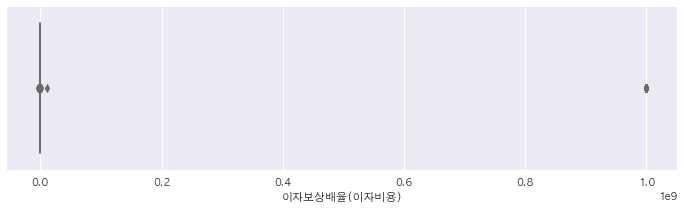

In [1205]:
# 이상치 확인
import seaborn as sns
target = "이자보상배율(이자비용)"

plt.figure(figsize=(12,3))
sns.boxplot(x=target, data=df_이자보상배율, palette="Set3")
# sns.swarmplot(data=df_이자보상배율, x=target)

In [1206]:
# winsorizing을 이용한 이상치 대체 방법
from scipy.stats.mstats import winsorize
퍼센트=0.1 # 위아래 각각 0.5%씩 대체
df_이자보상배율["이자보상배율(이자비용)"] = winsorize(df_이자보상배율["이자보상배율(이자비용)"], limits=[퍼센트/2, 퍼센트/2])

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_53838/3935368052.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


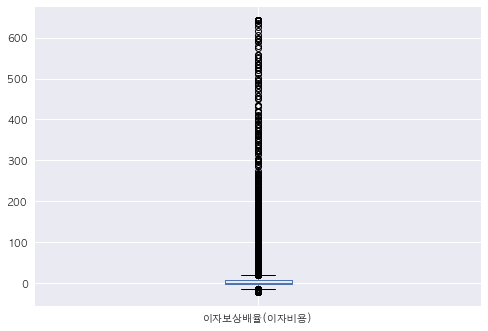

In [1207]:
# 이상치 확인
import matplotlib.pyplot as plt
import warnings
import numpy as np
import matplotlib
%matplotlib inline

plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "AppleGothic"

df_이자보상배율[["이자보상배율(이자비용)"]].boxplot()
    
plt.show()

In [1208]:
df_이자보상배율.sort_values(by="이자보상배율(이자비용)", ascending=False).head(5) # 최댓값 확인

,회사명,거래소코드,회계년도,이자보상배율(이자비용)
1721,(주)블루콤,033560,2018,641.95
7819,대우조선해양(주),042660,2011,641.95
1004,(주)동일기연,032960,2017,641.95
1003,(주)동일기연,032960,2016,641.95
1002,(주)동일기연,032960,2015,641.95


In [1209]:
df_이자보상배율.sort_values(by="이자보상배율(이자비용)", ascending=True).head(5) # 최솟값 확인

,회사명,거래소코드,회계년도,이자보상배율(이자비용)
5421,(주)초록뱀미디어,047820,2014,-21.97
15424,코오롱티슈진(주),950160,2018,-21.97
4963,(주)인트론바이오테크놀로지,048530,2017,-21.97
3263,(주)에스엠컬처앤콘텐츠,048550,2012,-21.97
3268,(주)에스엠컬처앤콘텐츠,048550,2017,-21.97


### 3. Labeling
- 내년 이자보상배율 컬럼 생성

In [1210]:
df_이자보상배율_label = df_이자보상배율.copy()
df_이자보상배율_label

,회사명,거래소코드,회계년도,이자보상배율(이자비용)
3144,케이알모터스(주),000040,2010,3.74
10761,케이알모터스(주),000040,2011,2.21
10762,케이알모터스(주),000040,2012,-6.47
10763,케이알모터스(주),000040,2013,-4.29
10764,케이알모터스(주),000040,2014,-4.60
...,...,...,...,...
10455,잉글우드랩(주),950140,2018,-0.36
10456,잉글우드랩(주),950140,2019,6.83
15423,코오롱티슈진(주),950160,2017,-21.97
15424,코오롱티슈진(주),950160,2018,-21.97


In [1211]:
list_companycode = list(df_이자보상배율_label["거래소코드"].unique())

dfs = list()
for i in list_companycode:
    #각 기업별로 데이터프레임 생성
    df_concat = df_이자보상배율_label[df_이자보상배율_label["거래소코드"]==i]
    # 연도 누락된거 생성하여 shift 문제없도록
    list_year_all = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
    list_year_real = list(df_concat["회계년도"].unique())
    for i in list_year_real:
        list_year_all.remove(i)
    df_year_all = pd.DataFrame({"회계년도":list_year_all})
    df_concat = pd.concat([df_concat,df_year_all])
    df_concat.sort_values(by="회계년도", inplace=True, ascending=True)
    
    df_concat["내년이자보상배율"] = df_concat["이자보상배율(이자비용)"].shift(-1)
    df_concat["t-1"] = df_concat["이자보상배율(이자비용)"].shift(1)
    df_concat["t-2"] = df_concat["이자보상배율(이자비용)"].shift(2)
    dfs.append(df_concat)

df_이자보상배율_label = pd.concat(dfs)
df_이자보상배율_label.dropna(inplace=True)
df_이자보상배율_label.reset_index(drop=True, inplace=True)

In [1213]:
df_이자보상배율_label

,회사명,거래소코드,회계년도,이자보상배율(이자비용),내년이자보상배율,t-1,t-2
0,케이알모터스(주),000040,2012.0,-6.47,-4.29,2.21,3.74
1,케이알모터스(주),000040,2013.0,-4.29,-4.60,-6.47,2.21
2,케이알모터스(주),000040,2014.0,-4.60,-4.59,-4.29,-6.47
3,케이알모터스(주),000040,2015.0,-4.59,-2.26,-4.60,-4.29
4,케이알모터스(주),000040,2016.0,-2.26,-6.04,-4.59,-4.60
...,...,...,...,...,...,...,...
6635,(주)엑세스바이오인코퍼레이션,950130,2015.0,0.19,-1.37,41.72,201.97
6636,(주)엑세스바이오인코퍼레이션,950130,2016.0,-1.37,-4.00,0.19,41.72
6637,(주)엑세스바이오인코퍼레이션,950130,2017.0,-4.00,-2.42,-1.37,0.19
6638,(주)엑세스바이오인코퍼레이션,950130,2018.0,-2.42,-3.67,-4.00,-1.37


In [1215]:
def func_updown1(x):
    if x >= 1:
        return True
    else:
        return False
    
df_이자보상배율_label["올해1미만"] = df_이자보상배율_label["이자보상배율(이자비용)"].map(func_updown1)
df_이자보상배율_label["내년1미만"] = df_이자보상배율_label["내년이자보상배율"].map(func_updown1)
df_이자보상배율_label["t-1"] = df_이자보상배율_label["t-1"].map(func_updown1)
df_이자보상배율_label["t-2"] = df_이자보상배율_label["t-2"].map(func_updown1)
df_이자보상배율_label["한계기업여부"] = (df_이자보상배율_label["올해1미만"] + df_이자보상배율_label["t-1"] + df_이자보상배율_label["t-2"]).map(func_not)
df_이자보상배율_label = df_이자보상배율_label[df_이자보상배율_label["한계기업여부"]==False]
df_이자보상배율_label.drop(["t-1", "t-2", "한계기업여부"], axis=1, inplace=True)
df_이자보상배율_label.dropna(axis=0, inplace=True)
df_이자보상배율_label

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_53838/400246118.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_이자보상배율_label.drop(["t-1", "t-2", "한계기업여부"], axis=1, inplace=True)
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_53838/400246118.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_이자보상배율_label.dropna(axis=0, inplace=True)


,회사명,거래소코드,회계년도,이자보상배율(이자비용),내년이자보상배율,올해1미만,내년1미만
0,케이알모터스(주),000040,2012.0,-6.47,-4.29,False,False
1,케이알모터스(주),000040,2013.0,-4.29,-4.60,False,False
7,(주)경방,000050,2012.0,0.36,2.58,False,True
8,(주)경방,000050,2013.0,2.58,2.47,True,True
9,(주)경방,000050,2014.0,2.47,3.90,True,True
...,...,...,...,...,...,...,...
6626,(주)얼라인드제네틱스,238120,2018.0,641.95,-4.12,True,False
6627,(주)케이피에스,256940,2018.0,298.07,-14.75,True,False
6635,(주)엑세스바이오인코퍼레이션,950130,2015.0,0.19,-1.37,False,False
6636,(주)엑세스바이오인코퍼레이션,950130,2016.0,-1.37,-4.00,False,False


1. T/T, T/F는 뺴야함
2. F/T는 label=1
3. F/F는 label=0

In [1216]:
df_이자보상배율_label_0 = df_이자보상배율_label[(df_이자보상배율_label["올해1미만"]==0)&(df_이자보상배율_label["내년1미만"]==0)]
df_이자보상배율_label_0["회생여부"] = False
df_이자보상배율_label_0 # 청산기업 : 1010개
print(len(df_이자보상배율_label_0))

df_이자보상배율_label_1 = df_이자보상배율_label[(df_이자보상배율_label["올해1미만"]==0)&(df_이자보상배율_label["내년1미만"]==1)]
df_이자보상배율_label_1["회생여부"] = True
df_이자보상배율_label_1 # 회생기업 : 606개
print(len(df_이자보상배율_label_1))

1010
606


/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_53838/2598129890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_이자보상배율_label_0["회생여부"] = False
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_53838/2598129890.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_이자보상배율_label_1["회생여부"] = True


In [1217]:
df_이자보상배율_label = pd.concat([df_이자보상배율_label_0,df_이자보상배율_label_1], axis=0, ignore_index=True)
df_이자보상배율_label.sort_values(by=["거래소코드","회계년도"], ascending=True, inplace=True)
df_이자보상배율_label.reset_index(drop=True, inplace=True)
df_이자보상배율_label = df_이자보상배율_label[["회사명", "거래소코드", "회계년도", "회생여부"]]
df_이자보상배율_label

,회사명,거래소코드,회계년도,회생여부
0,케이알모터스(주),000040,2012.0,False
1,케이알모터스(주),000040,2013.0,False
2,(주)경방,000050,2012.0,True
3,(주)삼양홀딩스,000070,2013.0,True
4,(주)두산,000150,2015.0,True
...,...,...,...,...
1611,자이글(주),234920,2018.0,False
1612,(주)클리오,237880,2018.0,True
1613,(주)엑세스바이오인코퍼레이션,950130,2015.0,False
1614,(주)엑세스바이오인코퍼레이션,950130,2016.0,False


In [1222]:
print("전체 청산기업수 :",len(df_이자보상배율_label[df_이자보상배율_label["회생여부"]==False]))
print("전체 회생기업수 :",len(df_이자보상배율_label[df_이자보상배율_label["회생여부"]==True]))
print("Test set 청산기업수 :",len(df_이자보상배율_label[(df_이자보상배율_label["회계년도"]==2018)&(df_이자보상배율_label["회생여부"]==False)]))
print("Test set 청산기업수 :",len(df_이자보상배율_label[(df_이자보상배율_label["회계년도"]==2018)&(df_이자보상배율_label["회생여부"]==True)]))

전체 청산기업수 : 1010
전체 회생기업수 : 606
Test set 청산기업수 : 181
Test set 청산기업수 : 110


In [1228]:
# 각 년도 데이터 수
list_year = [2012, 2013,2014,2015,2016,2017,2018]
for i in list_year:
    print(str(i)+"년 : ", len(df_이자보상배율_label[df_이자보상배율_label["회계년도"]==i]))

2012년 :  276
2013년 :  224
2014년 :  198
2015년 :  171
2016년 :  194
2017년 :  262
2018년 :  291
